# <h1 align="center"><font color = #119fbf>Lighthouse | Cientista de Dados | Indicium 🌎🚀</font></h1>

*Andressa Gomes Moreira - andressagomesm26@gmail.com*

## <a><font color = #119fbf>Objetivo</font></a>
O entendimento do problema de negócio e dos dados são etapas fundamentais no ciclo de vida de projetos de Ciências de Dados. Dessa forma, conhecer bem os dados, as distribuições, medidas estatísticas é essencial para gerar insights e solucionar problemas.

Nesse desafio, será realizada a análise exploratória dos dados (EDA) de um marketplace de compra e venda de veículos usados, a fim de responder às perguntas de negócios. E em seguida, serão utilizados modelos preditivos de Machine para precificar os carros do cliente. 

## <a><font color = #119fbf>Descrição do Negócio</font></a>
O time da Indicium está trabalhando junto a um cliente que o core business é compra e venda de veículos usados. Entretanto, a empresa possui dificuldades na área de revenda dos automóveis. 

Para resolver esse problema, a empresa comprou uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional e conseguir precificar o seu catálogo de forma mais competitiva e assim recuperar o mau desempenho neste setor.

O nosso objetivo, como time da Indicium, é analisar os dados para responder às perguntas de negócios feitas pelo cliente e criar 
um modelo preditivo que precifique os carros usados, para que eles fiquem o mais próximos dos valores de mercado

    a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
    b. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
    c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

## <a><font color = #119fbf>Descrição dos Dados</font></a>
Serão utilizados dois datasets:

    1. Um dataset para treinamento chamado cars_training composto por 29584 linhas, 28 colunas de informação (features) e a variável a ser prevista (“preco”).
    2. Um segundo dataset para teste chamado de cars_test composto por 9862 linhas e 28 colunas, sendo que este dataset não possui a coluna “preco”.


**Importações das bibliotecas**

In [120]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
import statistics as sts

import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

**Carregamento dos dados**

In [156]:
df = pd.read_csv('../dataset/cars_train (1) - cars_train (1).csv', sep=',')# encoding='utf-16')

In [152]:
!pip install pandas-profiling

In [164]:
import pandas_profiling
# Crie o perfil do DataFrame
profile = df.profile_report(title='Relatório de Perfil')

In [165]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.head()

id  num_fotos       marca   modelo  \
0  300716223898539419613863097469899222392        8.0      NISSAN    KICKS   
1  279639842134129588306469566150288644214        8.0        JEEP  COMPASS   
2   56414460810621048900295678236538171981       16.0         KIA  SORENTO   
3   56862509826849933428086372390159405545       14.0  VOLKSWAGEN   AMAROK   
4  338980975753200343894519909855598027197        8.0   SSANGYONG  KORANDO   

                                              versao  ano_de_fabricacao  \
0                    1.6 16V FLEXSTART SL 4P XTRONIC               2017   
1                    2.0 16V FLEX LIMITED AUTOMÁTICO               2017   
2              2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO               2018   
3  2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...               2013   
4         2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO               2013   

   ano_modelo  hodometro      cambio  num_portas  ... elegivel_revisao  \
0      2017.0    67772.0         CVT           4  ...            False   
1      2017.0    62979.0  Automática           4  ...            False   
2      2019.0    44070.0  Automática           4  ...            False   
3      2015.0    85357.0  Automática           4  ...            False   
4      2015.0    71491.0  Automática           4  ...            False   

  dono_aceita_troca veiculo_único_dono  \
0               NaN                NaN   
1      Aceita troca                NaN   
2      Aceita troca                NaN   
3      Aceita troca                NaN   
4               NaN                NaN   

                        revisoes_concessionaria  ipva_pago veiculo_licenciado  \
0  Todas as revisões feitas pela concessionária  IPVA pago         Licenciado   
1                                           NaN  IPVA pago                NaN   
2                                           NaN        NaN                NaN   
3                                           NaN  IPVA pago         Licenciado   
4  Todas as revisões feitas pela concessionária        NaN                NaN   

   garantia_de_fábrica                         revisoes_dentro_agenda  \
0                  NaN                                            NaN   
1                  NaN                                            NaN   
2                  NaN                                            NaN   
3                  NaN                                            NaN   
4  Garantia de fábrica  Todas as revisões feitas pela agenda do carro   

   veiculo_alienado          preco  
0               NaN   74732.590084  
1               NaN   81965.332634  
2               NaN  162824.814472  
3               NaN  123681.358857  
4               NaN   82419.763891  

[5 rows x 29 columns]

**Informações sobre o DataFrame**

In [5]:
df.shape

(29584, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

### Tratamento de Valores Nulos

In [157]:
df.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

**Excluindo as *features* 'id' e 'veiculo_alienado'**

In [158]:
df = df.drop('id', axis=1)
df = df.drop('veiculo_alienado', axis=1)

Para o tratamento dos dados Missing (NaN) iremos considerar que os valores ausentes das seguintes *features* representam o sentido oposto do valor não nulo da coluna: 

    ['dono_aceita_troca'; 'veiculo_único_dono'; 'revisoes_concessionaria'; 'ipva_pago'; 'veiculo_licenciado'; 'garantia_de_fábrica'; 'revisoes_dentro_agenda']
    
**Exemplo:**

    1. 'dono_aceita_troca':  [nan, 'Aceita troca'] => ['Não aceita Troca', 'Aceita troca'].
    2. 'ipva_pago' -> ['IPVA pago', nan] = ['IPVA pago', 'ipva não pago']

In [160]:
df['dono_aceita_troca'] = df['dono_aceita_troca'].replace(np.nan, 'Nao aceita troca')
df['veiculo_único_dono'] = df['veiculo_único_dono'].replace(np.nan, 'Não é único dono')
df['revisoes_concessionaria'] = df['revisoes_concessionaria'].replace(np.nan, 'Não possui todas as revisoes feitas pela concessionaria')
df['ipva_pago'] = df['ipva_pago'].replace(np.nan, 'ipva não pago')
df['veiculo_licenciado'] = df['veiculo_licenciado'].replace(np.nan, 'Não Licenciado')
df['garantia_de_fábrica'] = df['garantia_de_fábrica'].replace(np.nan, 'Não possui garantia de fábrica')
df['revisoes_dentro_agenda'] = df['revisoes_dentro_agenda'].replace(np.nan, 'não possui todas as revisões feitas pela agenda do carro')

**Os valores nulos de número de fotos serão substituídos pela mediana**

In [161]:
mediana = sts.median(df['num_fotos'])
mediana

8.0

In [162]:
df['num_fotos'].fillna(mediana, inplace=True)
df.isnull().sum()

num_fotos                  0
marca                      0
modelo                     0
versao                     0
ano_de_fabricacao          0
ano_modelo                 0
hodometro                  0
cambio                     0
num_portas                 0
tipo                       0
blindado                   0
cor                        0
tipo_vendedor              0
cidade_vendedor            0
estado_vendedor            0
anunciante                 0
entrega_delivery           0
troca                      0
elegivel_revisao           0
dono_aceita_troca          0
veiculo_único_dono         0
revisoes_concessionaria    0
ipva_pago                  0
veiculo_licenciado         0
garantia_de_fábrica        0
revisoes_dentro_agenda     0
preco                      0
dtype: int64

### Valores Duplicados

In [163]:
df.duplicated().sum()

0

## Informações Estatísticas

**Informações estatísticas para variáveis numéricas**

In [21]:
df.describe()

num_fotos  ano_de_fabricacao    ano_modelo      hodometro  \
count  29584.000000       29584.000000  29584.000000   29584.000000   
mean      10.309931        2016.758552   2017.808985   58430.592077   
std        3.481502           4.062422      2.673930   32561.769309   
min        8.000000        1985.000000   1997.000000     100.000000   
25%        8.000000        2015.000000   2016.000000   31214.000000   
50%        8.000000        2018.000000   2018.000000   57434.000000   
75%       14.000000        2019.000000   2020.000000   81953.500000   
max       21.000000        2022.000000   2023.000000  390065.000000   

         num_portas         preco  
count  29584.000000  2.958400e+04  
mean       3.940677  1.330239e+05  
std        0.338360  8.166287e+04  
min        2.000000  9.869951e+03  
25%        4.000000  7.657177e+04  
50%        4.000000  1.143558e+05  
75%        4.000000  1.636796e+05  
max        4.000000  1.359813e+06

**Informações estatísticas para as variáveis categóricas**

In [22]:
df.describe(include='object').T

count unique  \
marca                    29584     40   
modelo                   29584    457   
versao                   29584   1916   
cambio                   29584      7   
tipo                     29584      7   
blindado                 29584      2   
cor                      29584      7   
tipo_vendedor            29584      2   
cidade_vendedor          29584    575   
estado_vendedor          29584     25   
anunciante               29584      4   
dono_aceita_troca        29584      2   
veiculo_único_dono       29584      2   
revisoes_concessionaria  29584      2   
ipva_pago                29584      2   
veiculo_licenciado       29584      2   
garantia_de_fábrica      29584      2   
revisoes_dentro_agenda   29584      2   

                                                                       top  \
marca                                                           VOLKSWAGEN   
modelo                                                             COMPASS   
versao                              1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO   
cambio                                                          Automática   
tipo                                                                  Sedã   
blindado                                                                 N   
cor                                                                 Branco   
tipo_vendedor                                                           PF   
cidade_vendedor                                                  São Paulo   
estado_vendedor                                             São Paulo (SP)   
anunciante                                                   Pessoa Física   
dono_aceita_troca                                             Aceita troca   
veiculo_único_dono                                        Não é único dono   
revisoes_concessionaria  Não possui todas as revisoes feitas pela conce...   
ipva_pago                                                        IPVA pago   
veiculo_licenciado                                              Licenciado   
garantia_de_fábrica                         Não possui garantia de fábrica   
revisoes_dentro_agenda   não possui todas as revisões feitas pela agend...   

                          freq  
marca                     4594  
modelo                    1480  
versao                    1352  
cambio                   22545  
tipo                     16429  
blindado                 29336  
cor                      20949  
tipo_vendedor            17926  
cidade_vendedor           6158  
estado_vendedor          16378  
anunciante               17999  
dono_aceita_troca        21922  
veiculo_único_dono       19161  
revisoes_concessionaria  20412  
ipva_pago                19659  
veiculo_licenciado       15906  
garantia_de_fábrica      25219  
revisoes_dentro_agenda   23674

## Análise Exploratória de Dados

In [ ]:
def plot_annotate(ax, title):
    for rect in ax.patches:
        ax.annotate(rect.get_height(),
                (rect.get_x() + rect.get_width()/2, rect.get_height()),
                ha='center', va='baseline', fontsize=8, color='black',
                xytext=(0, 1), textcoords="offset points")
    ax.set_title(title)

#### Informações sobre o veículo

**Quantidade de carros fabricados em cada ano**

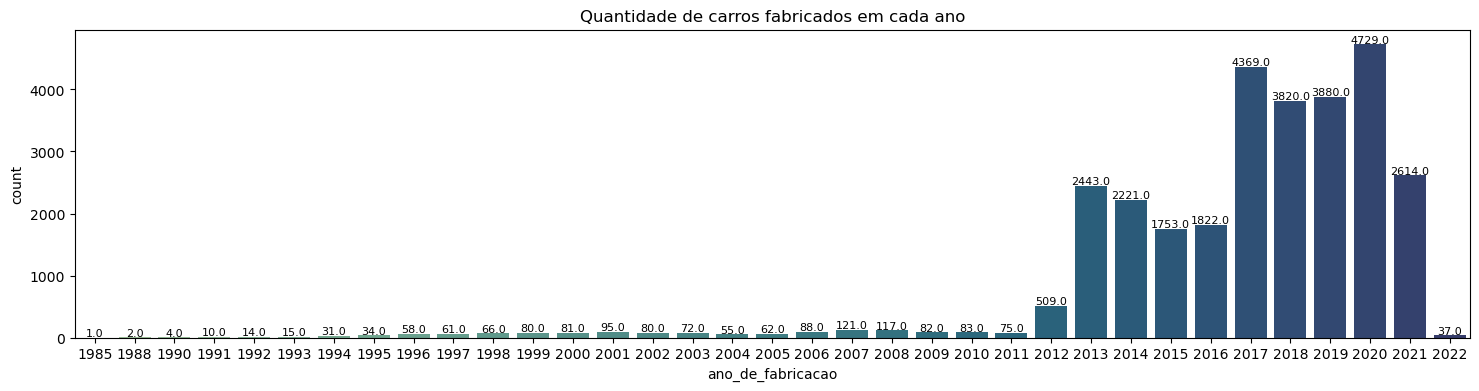

In [271]:
fig, axs = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x='ano_de_fabricacao', data=df, palette="crest")

plot_annotate(ax, 'Quantidade de carros fabricados em cada ano')
plt.show()

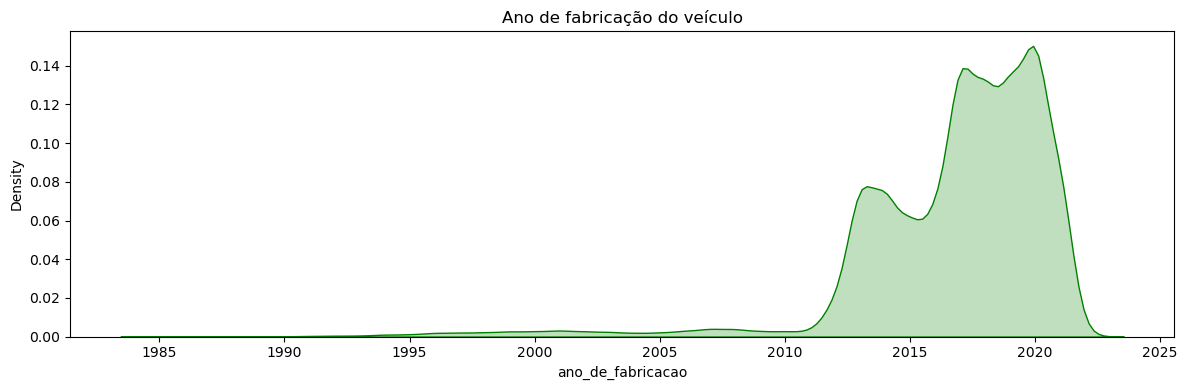

In [331]:
fig, axs = plt.subplots(figsize=(12, 4))

sns.kdeplot(df["ano_de_fabricacao"], color="Green", fill=True).set_title('Ano de fabricação do veículo');
#sns.kdeplot(df["ano_modelo"], color="Red", fill=True, ax=axs[1]).set_title('Valor cobrado do cliente mensalmente');

plt.tight_layout()
plt.show()

**Distribuição do valor registrado no hodômetro do veículo anunciado**

In [324]:
# fig, axs = plt.subplots(figsize=(8, 4))
# ax = sns.histplot(df["hodometro"], kde=True).set_title('Distribuição do valor registrado no hodômetro');
# plt.show()

Text(0.5, 1.0, 'Distribuição dos valores registrados no hodômetro')

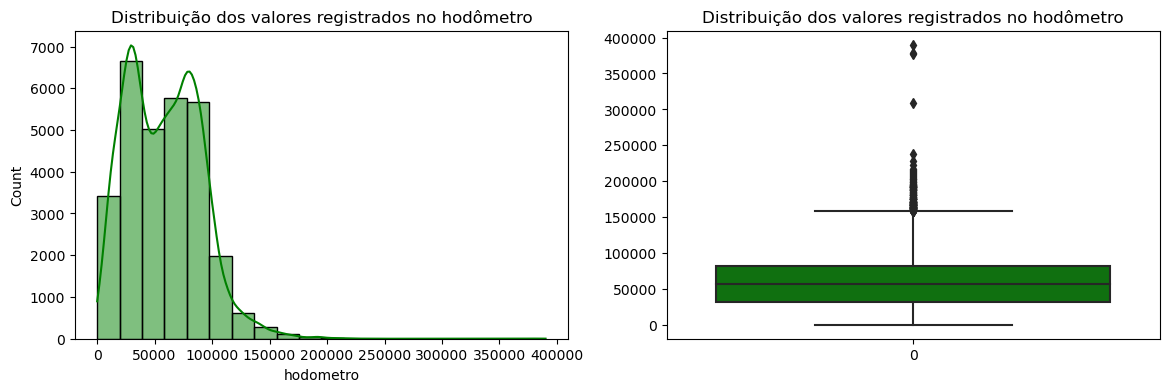

In [332]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

sns.histplot(df["hodometro"], kde=True, bins=20, color='Green', ax=axs[0]).set_title("Distribuição dos valores registrados no hodômetro")
sns.boxplot(df["hodometro"], color='Green', ax=axs[1]).set_title("Distribuição dos valores registrados no hodômetro")

**Distribuição dos preços**

In [325]:
# fig, axs = plt.subplots(figsize=(8, 4))
# ax = sns.histplot(df["preco"], kde=True).set_title('Distribuição do Preco');
# plt.show()

Text(0.5, 1.0, 'Distribuição do Preço')

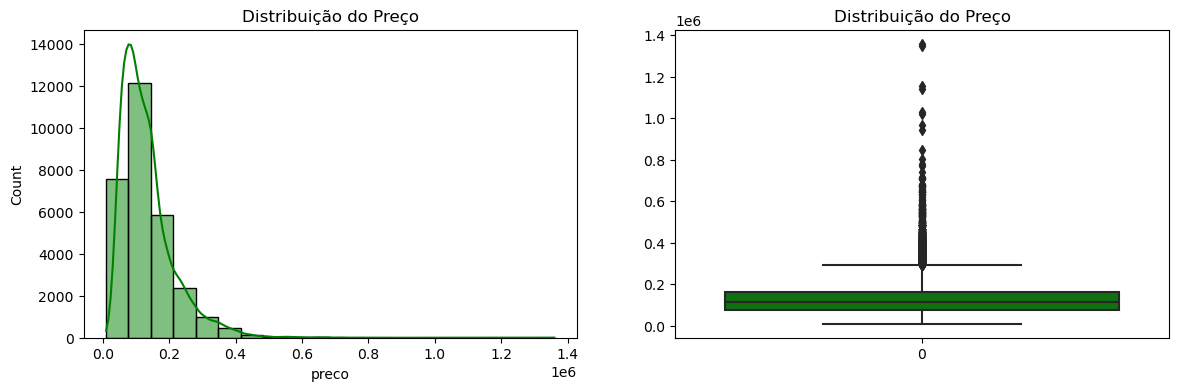

In [333]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

sns.histplot(df["preco"], kde=True, bins=20, color='Green', ax=axs[0]).set_title("Distribuição do Preço")
sns.boxplot(df["preco"], color='Green', ax=axs[1]).set_title("Distribuição do Preço")

**Quantidade de veículos para cada marca**

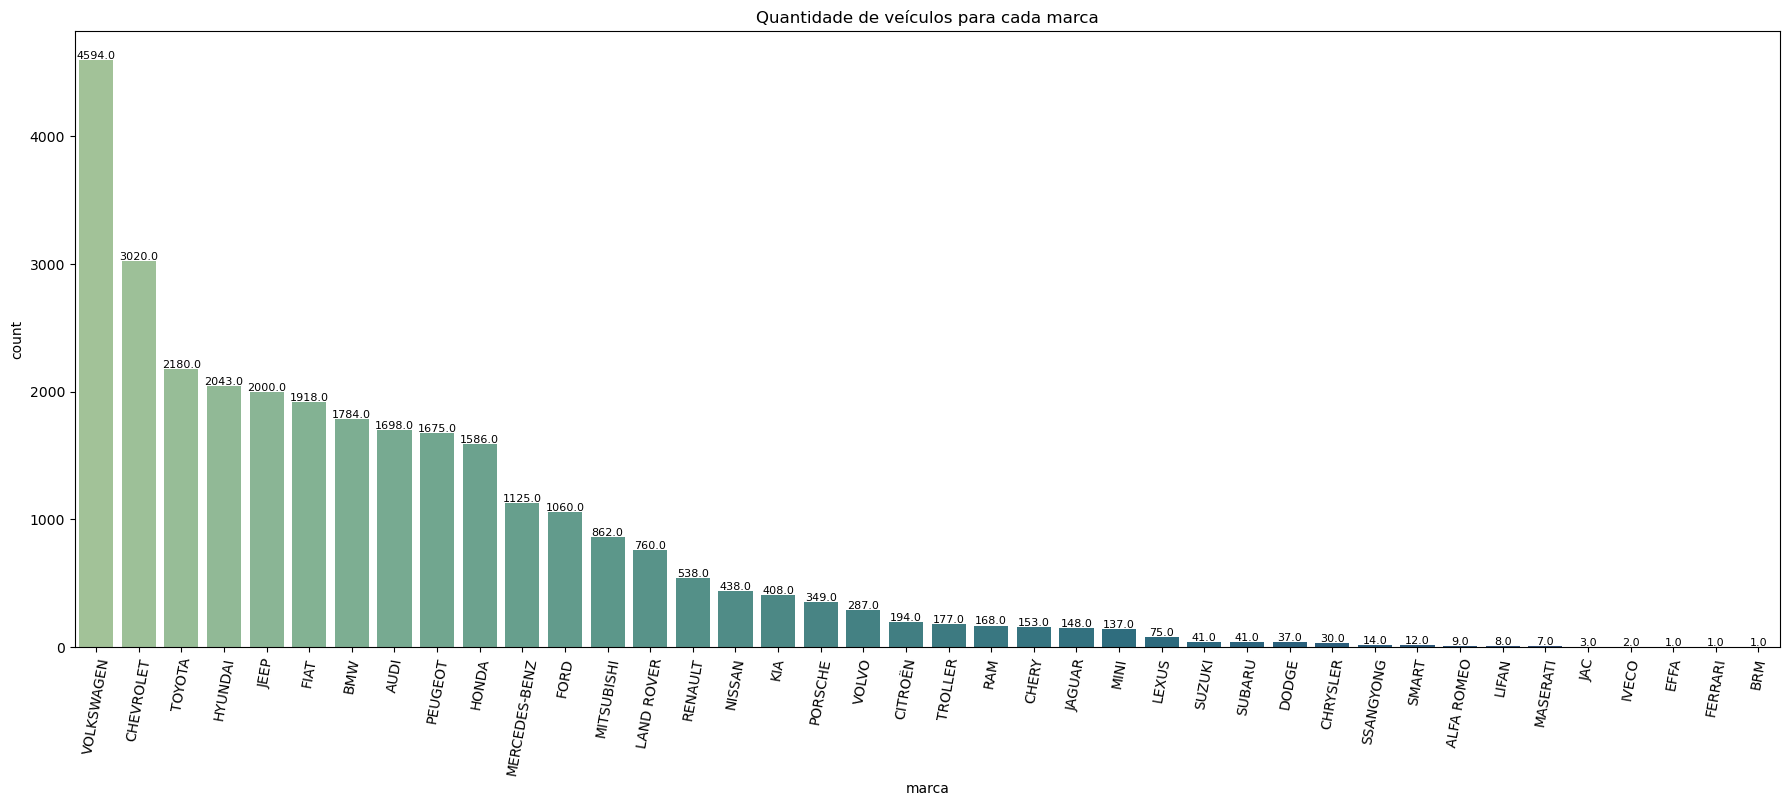

In [73]:
category_counts = df['marca'].value_counts().sort_values(ascending=False)

fig, axs = plt.subplots(figsize=(22, 8))
ax = sns.countplot(x='marca', data=df, order=category_counts.index, palette="crest")
plot_annotate(ax, 'Quantidade de veículos para cada marca')
plt.xticks(rotation=80)
plt.show()

**Distribuição de preço para as marcas mais vendidas**

In [74]:
# Marcas mais vendidas
df_count_marca = df[df['marca'].isin(category_counts[category_counts > 1000].index)]

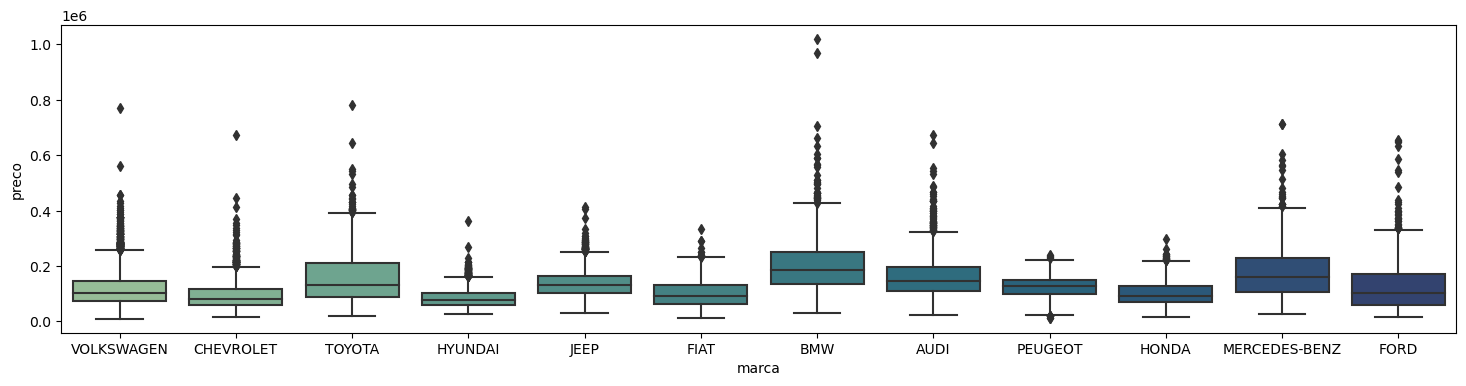

In [75]:
fig, axs = plt.subplots(figsize=(18, 4))
sns.boxplot(y='preco', x='marca', data=df_count_marca, order=category_counts.index[:12], palette="crest")

plt.show();

**Frequência para cada tipo de veículo**

In [265]:
porct_tipos = df.groupby('tipo').size() / df['tipo'].value_counts().sum() * 100 
porct_tipos = porct_tipos.sort_values(ascending=False).reset_index().rename(columns={0: 'porc'})
porct_tipos['porc'] = porct_tipos['porc'].apply(lambda x: '{:.2f}'.format(float(x)))
porct_tipos['porc'] = porct_tipos['porc'].astype(float)

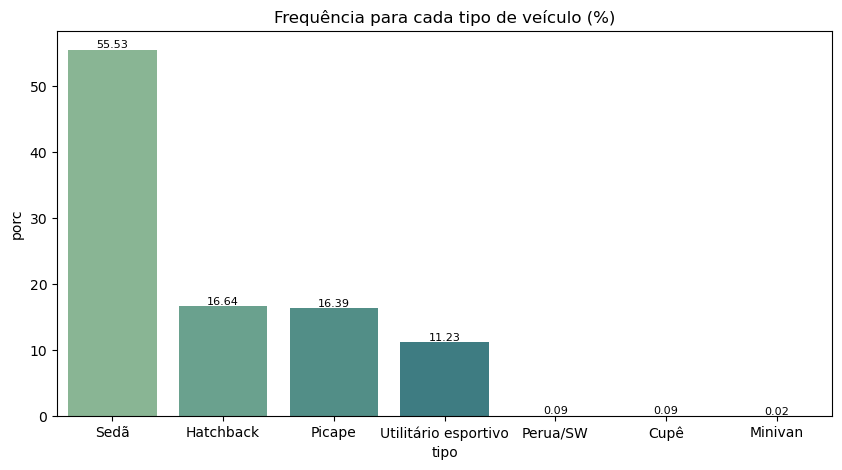

In [329]:
fig, axs = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='tipo', y='porc', data=porct_tipos, palette="crest")
plot_annotate(ax, 'Frequência para cada tipo de veículo (%)')
plt.show();

**Informações sobre aa revisões feitas em concessionárias, garantia de fábrica e se as revisões foram realizadas dentro da agenda prevista**

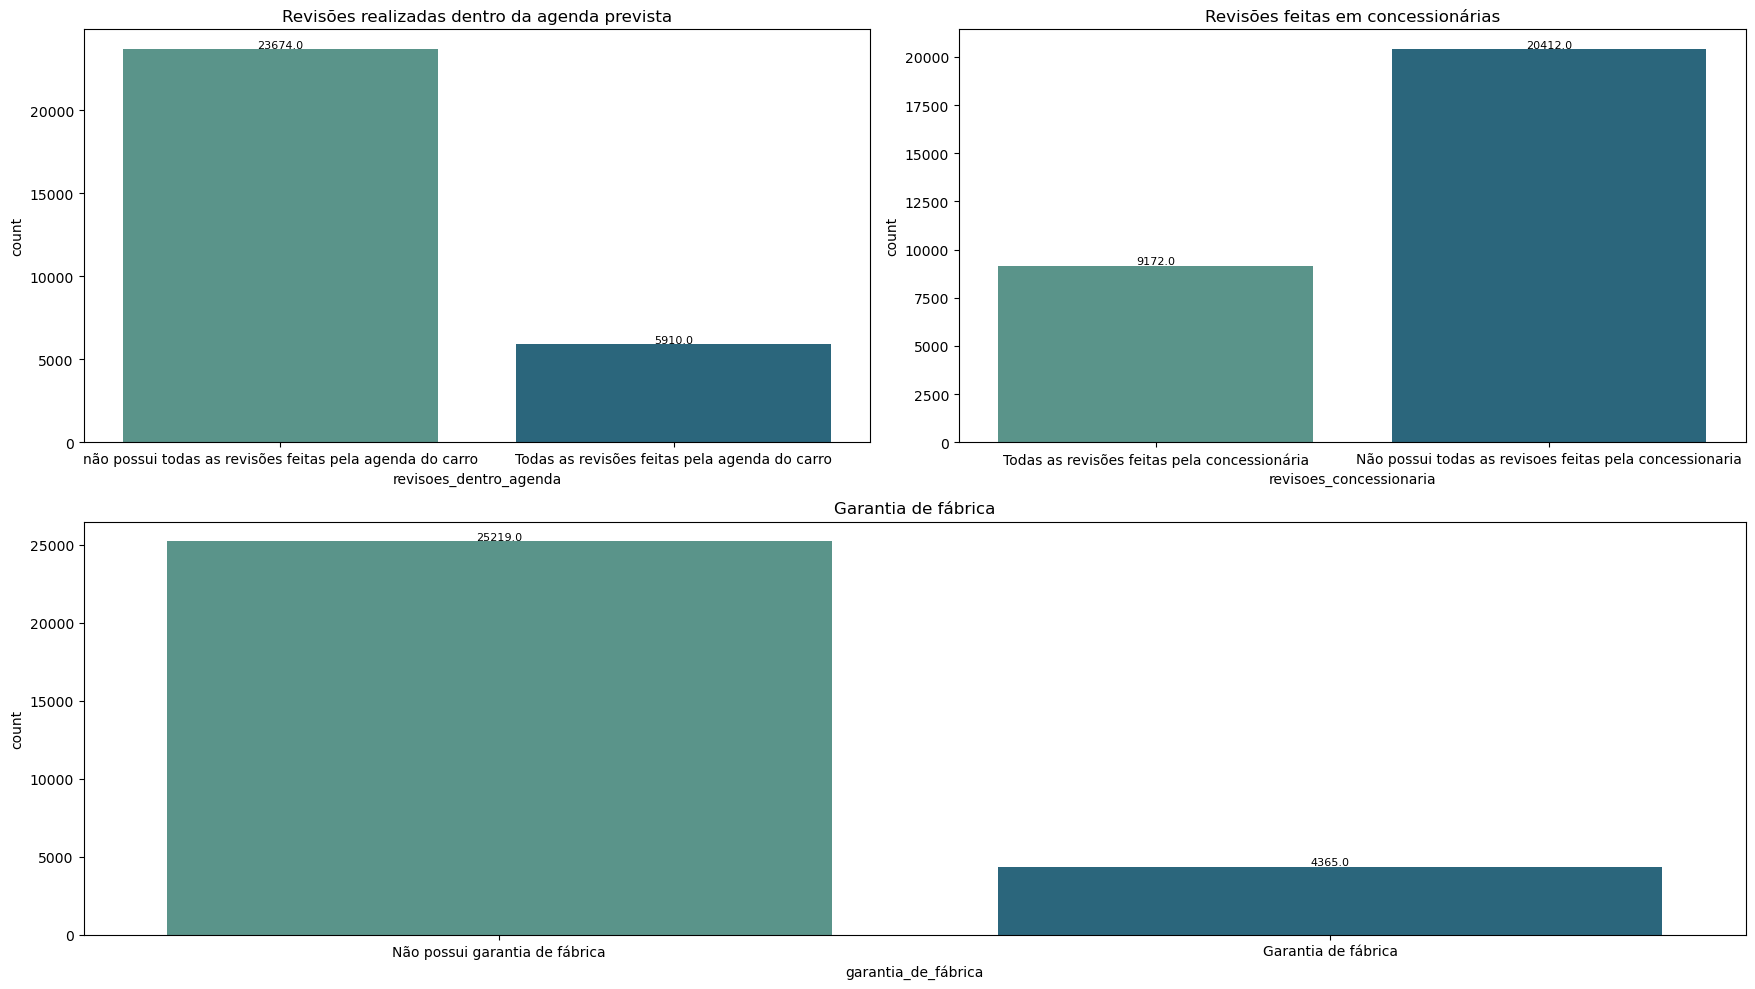

In [305]:
fig, axs = plt.subplot_mosaic("""AB
                                 CC""", figsize=(18,10))

ax1 = sns.countplot(x='revisoes_dentro_agenda', data=df, palette="crest", ax=axs['A'])
ax3 = sns.countplot(x='revisoes_concessionaria', data=df, palette="crest", ax=axs['B'])
ax2 = sns.countplot(x='garantia_de_fábrica', data=df, palette="crest", ax=axs['C'])

plot_annotate(ax1, "Revisões realizadas dentro da agenda prevista") 
plot_annotate(ax2, "Garantia de fábrica")
plot_annotate(ax3, 'Revisões feitas em concessionárias')

plt.tight_layout()
plt.show();

**Informações sobre o vendedor**

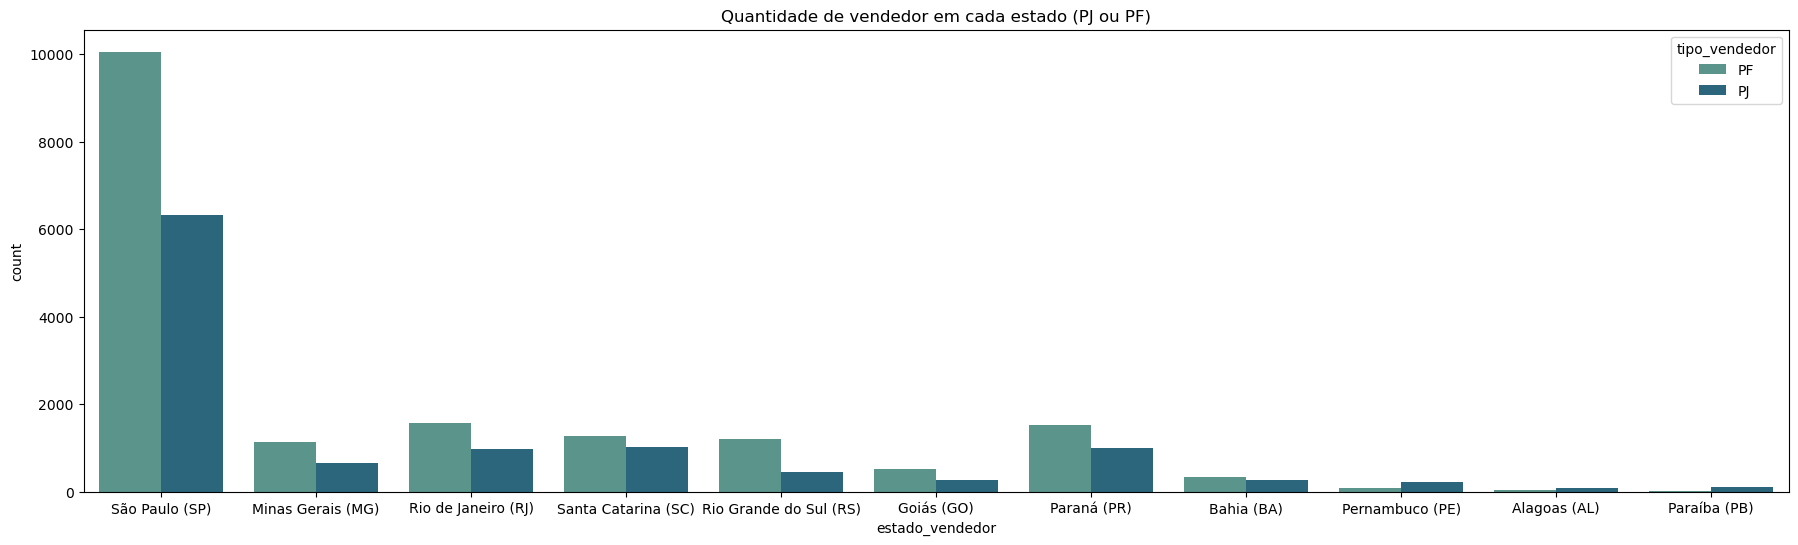

In [306]:
category_counts_est = df['estado_vendedor'].value_counts().sort_values(ascending=False)
df_count_est = df[df['estado_vendedor'].isin(category_counts_est[category_counts_est > 100].index)]

fig, axs = plt.subplots(figsize=(22, 6))
ax = sns.countplot(x='estado_vendedor', data=df_count_est, palette="crest", hue = "tipo_vendedor").set_title('Quantidade de vendedor em cada estado (PJ ou PF)')
plt.show()

**Verifica quais anunciantes realizam entrega**

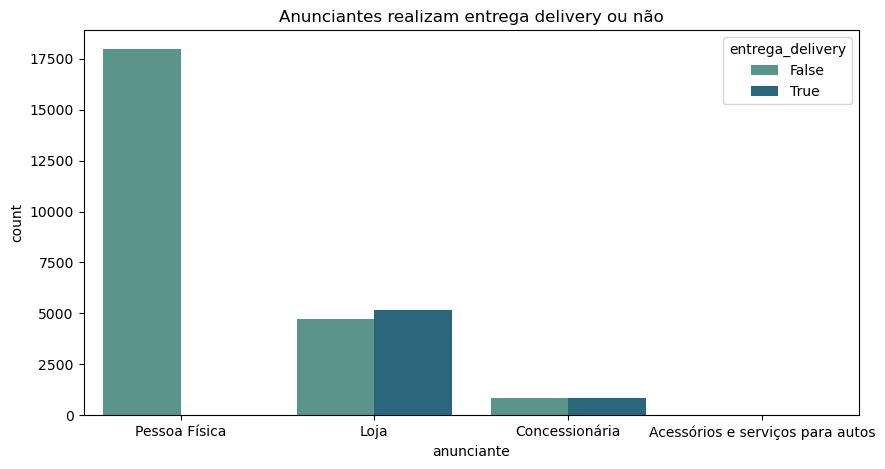

In [323]:
fig, axs = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='anunciante', data=df, palette="crest", hue = "entrega_delivery").set_title('Anunciantes realizam entrega delivery ou não')
plt.show()

## Hipóteses de Negócio

1. Existe relação entre o valor registrado no hodômetro do veículo e o preço?
2. O tipo de veículo interfere na média de preço?
3. Existe associação entre as variáveis IPVA PAGO e Veículo licenciado?

<!--* Coeficiente de correlação de Pearson (Pearson's r): É usado para medir a força e a direção da relação linear entre duas variáveis contínuas. É comumente aplicado quando você deseja determinar se existe uma relação linear significativa entre duas variáveis contínuas, como idade e pressão arterial.-->

### Hipótese de negócio 1

**Hipótese de negócio:** Existe relação entre o valor registrado no hodômetro do veículo e o preço?
    
    Hipótese Nula (H0): Não há correlação entre as variáveis
    Hipótese Alternativa (Ha): Há correlação entre as variáveis

Para testar as hipóteses acima será realizada a Análise Exploratória dos Dados e o teste de hipóteses. Para realizar o teste de hipótese, será utilizado o Coeficiente de correlação de Pearson, pois, queremos medir a relação entre as duas variáveis contínuas.

In [78]:
# Coef. de Correlação de Pearson
corr, p_value = stats.pearsonr(df['hodometro'], df['preco'])

# Nível de significância
alpha = 0.05

In [82]:
if p_value < alpha:
    print("Rejeita a H0. Há uma correlação significativa entre as variáveis.")
else:
    print("Não há indícios para rejeitar a H0. Não há uma correlação significativa entre as variáveis.")

Rejeita a H0. Há uma correlação significativa entre as variáveis.


> De acordo com o teste de hipótese realizado iremos **rejeitar H0** e **aceitar Ha**, ou seja, existe uma correlação significativa entre valor registrado no hodômetro e o preço do veículo.

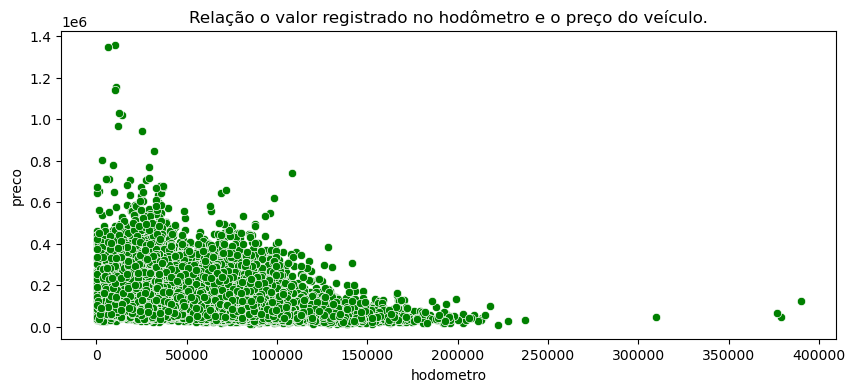

In [83]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.scatterplot(x='hodometro', y='preco', data=df, color='green').set_title('Relação o valor registrado no hodômetro e o preço do veículo.')

plt.show();

<!--* ANOVA (Análise de Variância): A ANOVA é usada quando você tem mais de dois grupos e deseja comparar as médias de uma variável contínua entre esses grupos. Por exemplo, se você quiser testar se há diferenças nas médias de renda entre diferentes níveis de escolaridade (por exemplo, ensino fundamental, ensino médio e ensino superior), você pode realizar uma ANOVA.


O tipo de do veículo interfere na média de preço do veículo?

**Hipótese de negócio:** Existe diferença entre o preço médio dos diferentes tipos de veículo
    
    H0: Não há diferença significativa nos preços médios entre os tipos de veículos.
    Ha: Há diferença significativa nos preços médios entre os tipos de veículos.
    >-->
### Hipótese de negócio 2

**Hipótese de negócio:** O tipo de veículo interfere na média de preço? 
    
    Hipótese Nula (H0): Não há diferença significativa nos preços médios dos tipos de veículos.
    Hipótese Alternativa (Ha): Há diferença significativa nos preços médios entre os tipos de veículos.

Para realizar o Teste de Hipótese, será utilizado a Análise de Variância (ANOVA), pois, queremos comparar as médias da variável contínua (Preço) entre os grupos (Tipos de veículos)

In [86]:
# ANOVA
model1 = ols('preco ~ tipo', data=df).fit()
anova_table = sm.stats.anova_lm(model1, typ=2)

# p_value
p_value = anova_table['PR(>F)'][0]

# Nível de significância
alpha = 0.05

In [88]:
if p_value < alpha:
    print("Rejeita a H0. Há uma diferença significativa entre as médias dos grupos.")
else:
    print("Não há indícios para rejeitar a H0. Não há uma diferença significativa entre as médias dos grupos.")

Rejeita a H0. Há uma diferença significativa entre as médias dos grupos.


> De acordo com o teste de hipótese realizado iremos **rejeitar H0** e **aceitar Ha**, ou seja, existe uma diferença entre o preço médio dos diferentes tipos de veículos.

**Média dos preços para cada tipo de veículo**

In [91]:
df_anova = pd.DataFrame({'tipo': df['tipo'], 'media_preco': df['preco']})
df_anova = df_anova.groupby('tipo')['media_preco'].mean().reset_index().sort_values(by='media_preco', ascending=False)
df_anova

tipo    media_preco
0                  Cupê  413260.359561
6  Utilitário esportivo  226122.989181
4                Picape  158906.210818
5                  Sedã  118191.936375
3              Perua/SW  110059.507733
1             Hatchback   92955.616973
2               Minivan   65217.048192

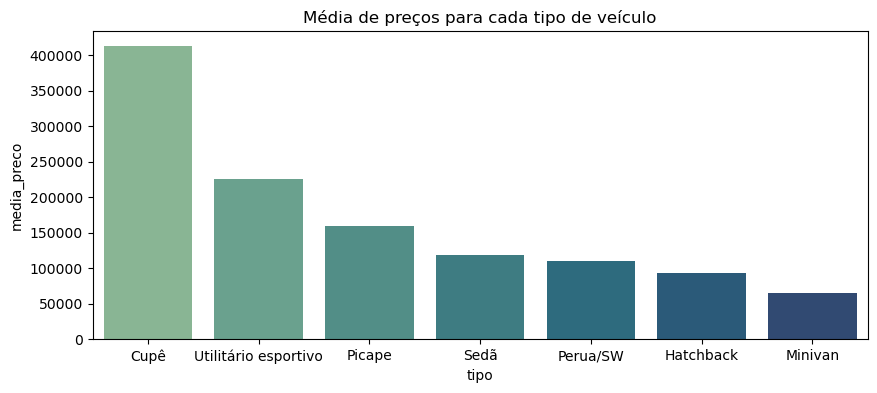

In [95]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.barplot(x='tipo', y='media_preco', data=df_anova, palette="crest").set_title('Média de preços para cada tipo de veículo')
plt.show();

**Distribuição dos preços para cada tipo de veículo**

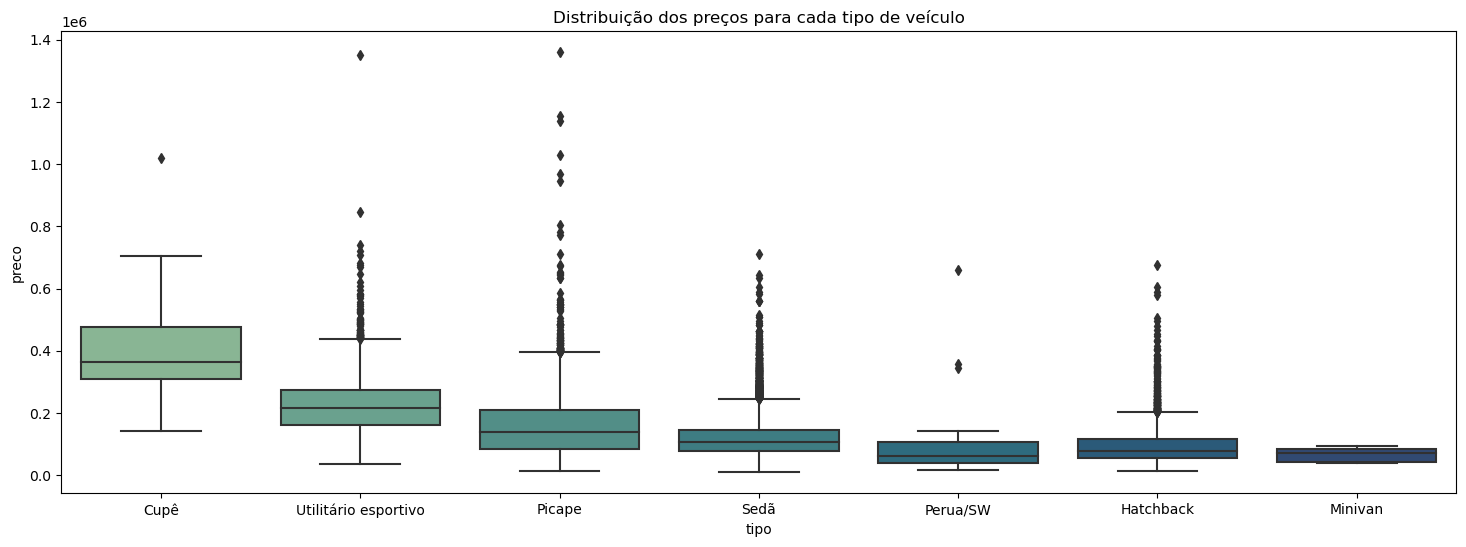

In [118]:
fig, axs = plt.subplots(figsize=(18, 6))
sns.boxplot(y='preco', x='tipo', data=df, order=df_anova['tipo'].values, palette="crest").set_title('Distribuição dos preços para cada tipo de veículo')
plt.show();

> É possível observar pela distribuição apresentada que os preços diferem para cada tipo de veículo

<!--* Qui-quadrado: O teste do qui-quadrado é usado quando você tem uma variável categórica e deseja testar se existe uma associação entre essa variável e outra variável categórica. Por exemplo, você pode usar um teste qui-quadrado para determinar se há uma associação entre gênero (masculino ou feminino) e preferência por um determinado tipo de filme (por exemplo, ação ou romance).
Defina as hipóteses nula e alternativa:

Hipótese nula (H0): Não há associação entre "IPVA pago" e "Licenciamento pago".
Hipótese alternativa (Ha): Há associação entre "IPVA pago" e "Licenciamento pago".-->

### Hipótese de negócio 3

**Hipótese de negócio:** Existe associação entre as variáveis IPVA PAGO e Veículo licenciado?
    
    Hipótese Nula (H0): Não há associação entre "IPVA Pago" e "Licenciamento pago".
    Hipótese Alternativa (Ha): Há associação entre "IPVA Pago" e "Licenciamento pago".

Para testar as hipóteses acima será utilizado o teste do qui-quadrado, pois, queremos testar a associação entre duas variáveis categóricas.

In [122]:
# Tabela de Contingência
tabela_conting = pd.crosstab( df['ipva_pago'], df['veiculo_licenciado'])

# Teste qui-quadrado
chi2, p_value, _, _ = chi2_contingency(tabela_conting)

# Nível de significância
alpha = 0.05

In [125]:
if p_value < alpha:
    print("Rejeita a H0. Há uma associação significativa entre as variáveis IPVA Pago e Licenciamento Pago.")
else:
    print("Não há indícios para rejeitar a H0. Não há uma associação significativa entre as variáveis IPVA Pago e Licenciamento Pago.")

Rejeita a H0. Há uma associação significativa entre as variáveis IPVA Pago e Licenciamento Pago.


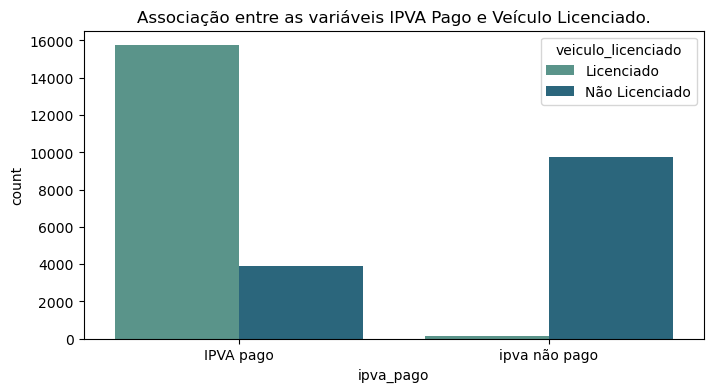

In [150]:
fig, axs = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x='ipva_pago', hue='veiculo_licenciado', palette="crest").set_title('Associação entre as variáveis IPVA Pago e Veículo Licenciado.')
plt.show();

> Em geral, os veículos que possuem o IPVA pago também possuem o licenciamento pago. Da mesma forma, a maioria dos veículos que não possuem IPVA pago também não possuem Licenciamento pago.

In [330]:
# tabela_conting.plot(kind='bar', stacked=True)
# plt.xlabel('IPVA Pago')
# plt.ylabel('Count')
# plt.show();

## Análise Exploratória de Dados

   a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular (preco) e por quê?
   
   b. Qual o melhor estado (estado_vendedor) para se comprar uma picape (tipo) com transmissão automática (cambio) e por quê?
   
   c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?


#### a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

> Vamos considerar carros de marca popular aqueles que possuem o valor abaixo de 80 mil.

> Além do preço, vamos avaliar também as revisões, ipva e licenciamento.

In [278]:
df_carro_popular = df[df['preco'] < 80000]

In [298]:
#df_carro_popular['estado_vendedor'].value_counts()
porcentagens = df_carro_popular.groupby('estado_vendedor').size() / df.groupby('estado_vendedor').size() * 100
porcentagens.sort_values(ascending=False)

estado_vendedor
Roraima (RR)                100.000000
Acre (AC)                    55.172414
Amazonas (AM)                54.901961
Paraíba (PB)                 42.592593
Ceará (CE)                   42.028986
Espírito Santo (ES)          38.095238
Pernambuco (PE)              34.276730
Rio Grande do Norte (RN)     31.111111
São Paulo (SP)               29.490780
Bahia (BA)                   29.470199
Mato Grosso do Sul (MS)      28.571429
Rio de Janeiro (RJ)          27.197802
Santa Catarina (SC)          26.542137
Minas Gerais (MG)            24.112676
Pará (PA)                    22.972973
Rio Grande do Sul (RS)       22.904010
Alagoas (AL)                 22.400000
Paraná (PR)                  20.981789
Tocantins (TO)               20.000000
Goiás (GO)                   13.941698
Sergipe (SE)                 12.500000
Mato Grosso (MT)             12.121212
Maranhão (MA)                      NaN
Piauí (PI)                         NaN
Rondônia (RO)                      NaN
dtype: fl

In [ ]:
df_carro_popular_demanda = df_carro_popular_demanda.groupby('estado_vendedor')['revisoes_concessionaria'].value_counts().sort_values(ascending=False)
veiculo_teste

In [269]:
#df_carro_popular1 = df_carro_popular.groupby(['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'ipva_pago', 'veiculo_licenciado']).size().reset_index(name='Total')
df_carro_popular1 = df_carro_popular.groupby(['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda']).size().reset_index(name='Total')
df_carro_popular1

estado_vendedor             garantia_de_fábrica  \
0        Acre (AC)             Garantia de fábrica   
1        Acre (AC)  Não possui garantia de fábrica   
2        Acre (AC)  Não possui garantia de fábrica   
3     Alagoas (AL)             Garantia de fábrica   
4     Alagoas (AL)             Garantia de fábrica   
..             ...                             ...   
56  São Paulo (SP)             Garantia de fábrica   
57  São Paulo (SP)             Garantia de fábrica   
58  São Paulo (SP)  Não possui garantia de fábrica   
59  São Paulo (SP)  Não possui garantia de fábrica   
60  Tocantins (TO)  Não possui garantia de fábrica   

                               revisoes_dentro_agenda  Total  
0   não possui todas as revisões feitas pela agend...      1  
1       Todas as revisões feitas pela agenda do carro      4  
2   não possui todas as revisões feitas pela agend...     11  
3       Todas as revisões feitas pela agenda do carro      1  
4   não possui todas as revisões feitas pela agend...      6  
..                                                ...    ...  
56      Todas as revisões feitas pela agenda do carro    159  
57  não possui todas as revisões feitas pela agend...     87  
58      Todas as revisões feitas pela agenda do carro    521  
59  não possui todas as revisões feitas pela agend...   4063  
60  não possui todas as revisões feitas pela agend...      4  

[61 rows x 4 columns]

In [270]:
#df_carro_popular2 = df_carro_popular.groupby(['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'ipva_pago', 'veiculo_licenciado']).agg(media_preco=('preco', 'mean')).reset_index()
df_carro_popular2 = df_carro_popular.groupby(['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda']).agg(media_preco=('preco', 'mean')).reset_index()
df_carro_popular2

estado_vendedor             garantia_de_fábrica  \
0        Acre (AC)             Garantia de fábrica   
1        Acre (AC)  Não possui garantia de fábrica   
2        Acre (AC)  Não possui garantia de fábrica   
3     Alagoas (AL)             Garantia de fábrica   
4     Alagoas (AL)             Garantia de fábrica   
..             ...                             ...   
56  São Paulo (SP)             Garantia de fábrica   
57  São Paulo (SP)             Garantia de fábrica   
58  São Paulo (SP)  Não possui garantia de fábrica   
59  São Paulo (SP)  Não possui garantia de fábrica   
60  Tocantins (TO)  Não possui garantia de fábrica   

                               revisoes_dentro_agenda   media_preco  
0   não possui todas as revisões feitas pela agend...  72811.745577  
1       Todas as revisões feitas pela agenda do carro  62812.803226  
2   não possui todas as revisões feitas pela agend...  51997.502474  
3       Todas as revisões feitas pela agenda do carro  55861.243630  
4   não possui todas as revisões feitas pela agend...  64103.417434  
..                                                ...           ...  
56      Todas as revisões feitas pela agenda do carro  64187.042686  
57  não possui todas as revisões feitas pela agend...  66180.936241  
58      Todas as revisões feitas pela agenda do carro  57305.219154  
59  não possui todas as revisões feitas pela agend...  58073.561045  
60  não possui todas as revisões feitas pela agend...  55599.893939  

[61 rows x 4 columns]

In [271]:
df_carro_popular1['media_preco'] = df_carro_popular2['media_preco']
df_carro_popular1

estado_vendedor             garantia_de_fábrica  \
0        Acre (AC)             Garantia de fábrica   
1        Acre (AC)  Não possui garantia de fábrica   
2        Acre (AC)  Não possui garantia de fábrica   
3     Alagoas (AL)             Garantia de fábrica   
4     Alagoas (AL)             Garantia de fábrica   
..             ...                             ...   
56  São Paulo (SP)             Garantia de fábrica   
57  São Paulo (SP)             Garantia de fábrica   
58  São Paulo (SP)  Não possui garantia de fábrica   
59  São Paulo (SP)  Não possui garantia de fábrica   
60  Tocantins (TO)  Não possui garantia de fábrica   

                               revisoes_dentro_agenda  Total   media_preco  
0   não possui todas as revisões feitas pela agend...      1  72811.745577  
1       Todas as revisões feitas pela agenda do carro      4  62812.803226  
2   não possui todas as revisões feitas pela agend...     11  51997.502474  
3       Todas as revisões feitas pela agenda do carro      1  55861.243630  
4   não possui todas as revisões feitas pela agend...      6  64103.417434  
..                                                ...    ...           ...  
56      Todas as revisões feitas pela agenda do carro    159  64187.042686  
57  não possui todas as revisões feitas pela agend...     87  66180.936241  
58      Todas as revisões feitas pela agenda do carro    521  57305.219154  
59  não possui todas as revisões feitas pela agend...   4063  58073.561045  
60  não possui todas as revisões feitas pela agend...      4  55599.893939  

[61 rows x 5 columns]

In [277]:
df_carro_popular3 = df_carro_popular1.loc[(df_carro_popular2['revisoes_dentro_agenda']  == 'Todas as revisões feitas pela agenda do carro')
                                          & (df_carro_popular2['garantia_de_fábrica'] == 'Garantia de fábrica')]
df_carro_popular3.sort_values(by='Total', ascending=False)

estado_vendedor  garantia_de_fábrica  \
56            São Paulo (SP)  Garantia de fábrica   
28               Paraná (PR)  Garantia de fábrica   
51       Santa Catarina (SC)  Garantia de fábrica   
42    Rio Grande do Sul (RS)  Garantia de fábrica   
46       Rio de Janeiro (RJ)  Garantia de fábrica   
24         Minas Gerais (MG)  Garantia de fábrica   
18                Goiás (GO)  Garantia de fábrica   
8                 Bahia (BA)  Garantia de fábrica   
37           Pernambuco (PE)  Garantia de fábrica   
33                 Pará (PA)  Garantia de fábrica   
40  Rio Grande do Norte (RN)  Garantia de fábrica   
6              Amazonas (AM)  Garantia de fábrica   
3               Alagoas (AL)  Garantia de fábrica   
14       Espírito Santo (ES)  Garantia de fábrica   

                           revisoes_dentro_agenda  Total   media_preco  
56  Todas as revisões feitas pela agenda do carro    159  64187.042686  
28  Todas as revisões feitas pela agenda do carro     22  63914.622144  
51  Todas as revisões feitas pela agenda do carro     22  62747.155006  
42  Todas as revisões feitas pela agenda do carro     20  68648.874151  
46  Todas as revisões feitas pela agenda do carro     14  60905.771419  
24  Todas as revisões feitas pela agenda do carro     12  60712.027478  
18  Todas as revisões feitas pela agenda do carro      8  59261.299510  
8   Todas as revisões feitas pela agenda do carro      5  55814.727139  
37  Todas as revisões feitas pela agenda do carro      5  68354.036170  
33  Todas as revisões feitas pela agenda do carro      3  69592.002015  
40  Todas as revisões feitas pela agenda do carro      3  66213.423172  
6   Todas as revisões feitas pela agenda do carro      2  60467.432540  
3   Todas as revisões feitas pela agenda do carro      1  55861.243630  
14  Todas as revisões feitas pela agenda do carro      1  49919.575982

## Análise Exploratória de Dados

    a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular (preco) e por quê?
    b. Qual o melhor estado (estado_vendedor) para se comprar uma picape (tipo) com transmissão automática (cambio) e por quê?
    c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?


In [ ]:
#df_picape = df[df['tipo']=='Picape'] and df[df['cambio']!='Manual'] or df[df['cambio']!='Semi-automática']
#df_filtrado = df.loc[(df['transmissao'] != 'Manual') & (df['transmissao'] != 'Semi-automática') & (df['tipo'] == 'fiat')]

   b. Qual o melhor estado (estado_vendedor)  para se comprar uma picape (tipo) com transmissão automática (cambio) e por quê?
    entrega_delivery
   elegivel_revisao
   dono_aceita_troca
   veiculo_único_dono
   revisoes_concessionaria
   ipva_pago
   veiculo_licenciado
   garantia_de_fábrica
   preco

In [ ]:
df

In [75]:
df_picape = df[df['tipo']=='Picape']

In [76]:
df_picape_automatico = df_picape.loc[~df_picape['cambio'].isin(['Manual', 'Semi-automática'])]

In [234]:
df_picape_automatico['garantia_de_fábrica'].unique()

array(['Não possui garantia de fábrica', 'Garantia de fábrica'],
      dtype=object)

KeyError: 'ipva_pago'

In [150]:
#df_agrupado = df.groupby(['estado_vendedor', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado']).size().reset_index(name='Total').sort_values(ascending=False)  #[df == 'sim']
df_agrupado = df_picape_automatico.groupby(['estado_vendedor', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado']).size().reset_index(name='Total')

#df_agrupado

df_filtrado2 = df_agrupado.loc[(df_agrupado['revisoes_concessionaria'] == 'Todas as revisões feitas pela concessionária') & (df_agrupado['ipva_pago'] == 'IPVA pago') & (df_agrupado['veiculo_licenciado'] == 'Licenciado')]
df_filtrado2['media_preco'] = df_filtrado['media_preco']
df_filtrado2.sort_values(by='media_preco')

estado_vendedor                       revisoes_concessionaria  \
11               Bahia (BA)  Todas as revisões feitas pela concessionária   
30        Minas Gerais (MG)  Todas as revisões feitas pela concessionária   
36              Paraná (PR)  Todas as revisões feitas pela concessionária   
26  Mato Grosso do Sul (MS)  Todas as revisões feitas pela concessionária   
49   Rio Grande do Sul (RS)  Todas as revisões feitas pela concessionária   
70           São Paulo (SP)  Todas as revisões feitas pela concessionária   
55      Rio de Janeiro (RJ)  Todas as revisões feitas pela concessionária   
61      Santa Catarina (SC)  Todas as revisões feitas pela concessionária   
2                 Acre (AC)  Todas as revisões feitas pela concessionária   
22         Mato Grosso (MT)  Todas as revisões feitas pela concessionária   
18               Goiás (GO)  Todas as revisões feitas pela concessionária   
6              Alagoas (AL)  Todas as revisões feitas pela concessionária   

    ipva_pago veiculo_licenciado  Total    media_preco  
11  IPVA pago         Licenciado      1  162740.340722  
30  IPVA pago         Licenciado     36  162938.258126  
36  IPVA pago         Licenciado     59  193343.750582  
26  IPVA pago         Licenciado      1  194456.837665  
49  IPVA pago         Licenciado     61  201303.515420  
70  IPVA pago         Licenciado    494  202109.527668  
55  IPVA pago         Licenciado     85  205736.955760  
61  IPVA pago         Licenciado     50  218247.330119  
2   IPVA pago         Licenciado      2  222320.162634  
22  IPVA pago         Licenciado      2  227634.951384  
18  IPVA pago         Licenciado     23  228626.628877  
6   IPVA pago         Licenciado      8  236877.348731

In [153]:
202109 - 201303

806

In [118]:
veiculo_teste = df_picape_automatico.groupby('estado_vendedor')['revisoes_concessionaria'].value_counts().sort_values(ascending=False)
veiculo_teste

estado_vendedor           revisoes_concessionaria                                
São Paulo (SP)            Não possui todas as revisoes feitas pela concessionaria    1119
                          Todas as revisões feitas pela concessionária                623
Paraná (PR)               Não possui todas as revisoes feitas pela concessionaria     230
Rio de Janeiro (RJ)       Não possui todas as revisoes feitas pela concessionaria     215
Santa Catarina (SC)       Não possui todas as revisoes feitas pela concessionaria     199
Minas Gerais (MG)         Não possui todas as revisoes feitas pela concessionaria     138
Paraná (PR)               Todas as revisões feitas pela concessionária                125
Rio Grande do Sul (RS)    Não possui todas as revisoes feitas pela concessionaria     117
Rio de Janeiro (RJ)       Todas as revisões feitas pela concessionária                110
Santa Catarina (SC)       Todas as revisões feitas pela concessionária                 87
Rio Grande do Sul 

In [111]:
ipva_pago = df_picape_automatico.groupby('estado_vendedor')['ipva_pago'].value_counts().sort_values(ascending=False)

In [112]:
ipva_pago

estado_vendedor           ipva_pago    
São Paulo (SP)            IPVA pago        1163
                          ipva não pago     579
Rio de Janeiro (RJ)       IPVA pago         227
Paraná (PR)               IPVA pago         200
Rio Grande do Sul (RS)    IPVA pago         156
Paraná (PR)               ipva não pago     155
Santa Catarina (SC)       ipva não pago     145
                          IPVA pago         141
Minas Gerais (MG)         IPVA pago         130
Rio de Janeiro (RJ)       ipva não pago      98
Minas Gerais (MG)         ipva não pago      82
Goiás (GO)                IPVA pago          77
Bahia (BA)                ipva não pago      59
Rio Grande do Sul (RS)    ipva não pago      45
Goiás (GO)                ipva não pago      26
Pernambuco (PE)           ipva não pago      14
Alagoas (AL)              IPVA pago          12
Bahia (BA)                IPVA pago          10
Mato Grosso (MT)          IPVA pago           6
Mato Grosso do Sul (MS)   IPVA pago           5


In [109]:
veiculo_licenciado = df_picape_automatico.groupby('estado_vendedor')['veiculo_licenciado'].value_counts().sort_values(ascending=False)

In [110]:
veiculo_licenciado

estado_vendedor           veiculo_licenciado
São Paulo (SP)            Licenciado            1020
                          Não Licenciado         722
Paraná (PR)               Não Licenciado         237
Santa Catarina (SC)       Não Licenciado         189
Rio de Janeiro (RJ)       Licenciado             176
                          Não Licenciado         149
Minas Gerais (MG)         Não Licenciado         136
Paraná (PR)               Licenciado             118
Rio Grande do Sul (RS)    Licenciado             113
Santa Catarina (SC)       Licenciado              97
Rio Grande do Sul (RS)    Não Licenciado          88
Minas Gerais (MG)         Licenciado              76
Bahia (BA)                Não Licenciado          67
Goiás (GO)                Licenciado              53
                          Não Licenciado          50
Pernambuco (PE)           Não Licenciado          14
Alagoas (AL)              Licenciado              12
Mato Grosso (MT)          Licenciado               5
S

In [93]:
media_por_estado = df_picape_automatico.groupby('estado_vendedor')['preco'].mean().sort_values()

In [100]:
disponibilidade_por_estado = df_picape_automatico['estado_vendedor'].value_counts()

In [101]:
disponibilidade_por_estado

São Paulo (SP)              1742
Paraná (PR)                  355
Rio de Janeiro (RJ)          325
Santa Catarina (SC)          286
Minas Gerais (MG)            212
Rio Grande do Sul (RS)       201
Goiás (GO)                   103
Bahia (BA)                    69
Pernambuco (PE)               14
Alagoas (AL)                  12
Acre (AC)                      6
Mato Grosso (MT)               6
Sergipe (SE)                   5
Mato Grosso do Sul (MS)        5
Paraíba (PB)                   4
Piauí (PI)                     4
Tocantins (TO)                 3
Rio Grande do Norte (RN)       1
Ceará (CE)                     1
Amazonas (AM)                  1
Name: estado_vendedor, dtype: int64

In [94]:
media_por_estado

estado_vendedor
Amazonas (AM)                62226.485320
Paraíba (PB)                 93157.035264
Ceará (CE)                  125209.173790
Mato Grosso do Sul (MS)     144700.247621
Acre (AC)                   145256.693656
Rio Grande do Norte (RN)    179961.694768
Rio de Janeiro (RJ)         180266.517470
Santa Catarina (SC)         186606.995687
Tocantins (TO)              187717.127524
São Paulo (SP)              188439.234439
Pernambuco (PE)             192566.764505
Minas Gerais (MG)           194953.405618
Rio Grande do Sul (RS)      195266.449017
Paraná (PR)                 197578.692308
Bahia (BA)                  204441.846940
Goiás (GO)                  206603.625276
Piauí (PI)                  208181.077756
Mato Grosso (MT)            214102.315642
Alagoas (AL)                218671.542780
Sergipe (SE)                298195.309673
Name: preco, dtype: float64

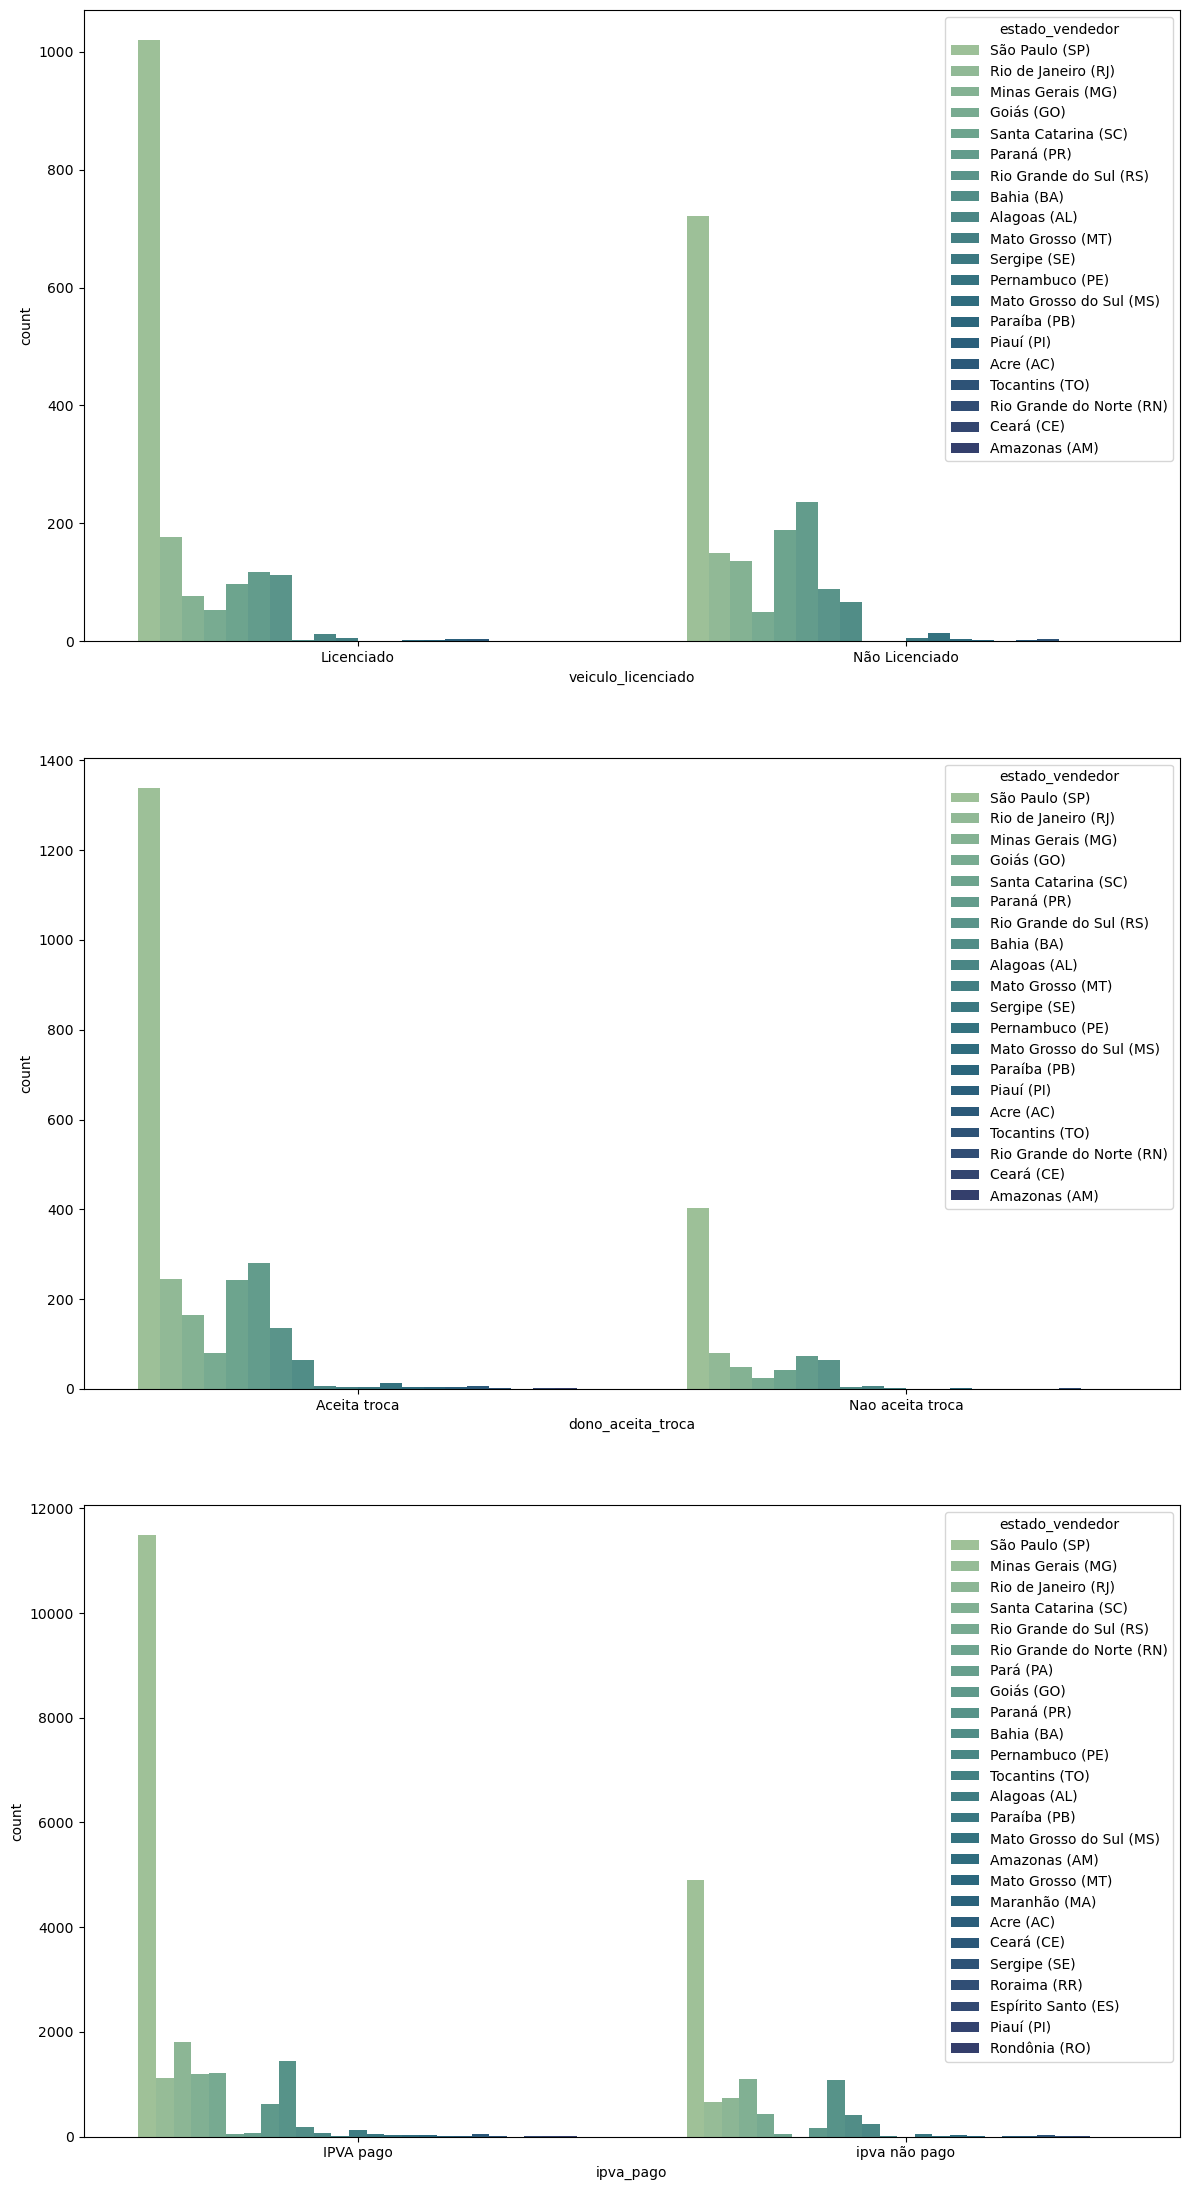

In [88]:
fig, axs = plt.subplots(3, 1, figsize=(12,22))

ax = sns.countplot(x='veiculo_licenciado', data=df_picape_automatico, palette="crest", ax=axs[0], hue='estado_vendedor')
ax1 = sns.countplot(x='dono_aceita_troca', data=df_picape_automatico, palette="crest", ax=axs[1], hue='estado_vendedor')
ax2 = sns.countplot(x='ipva_pago', data=df, palette="crest", ax=axs[2], hue='estado_vendedor')

plt.tight_layout()
plt.show()

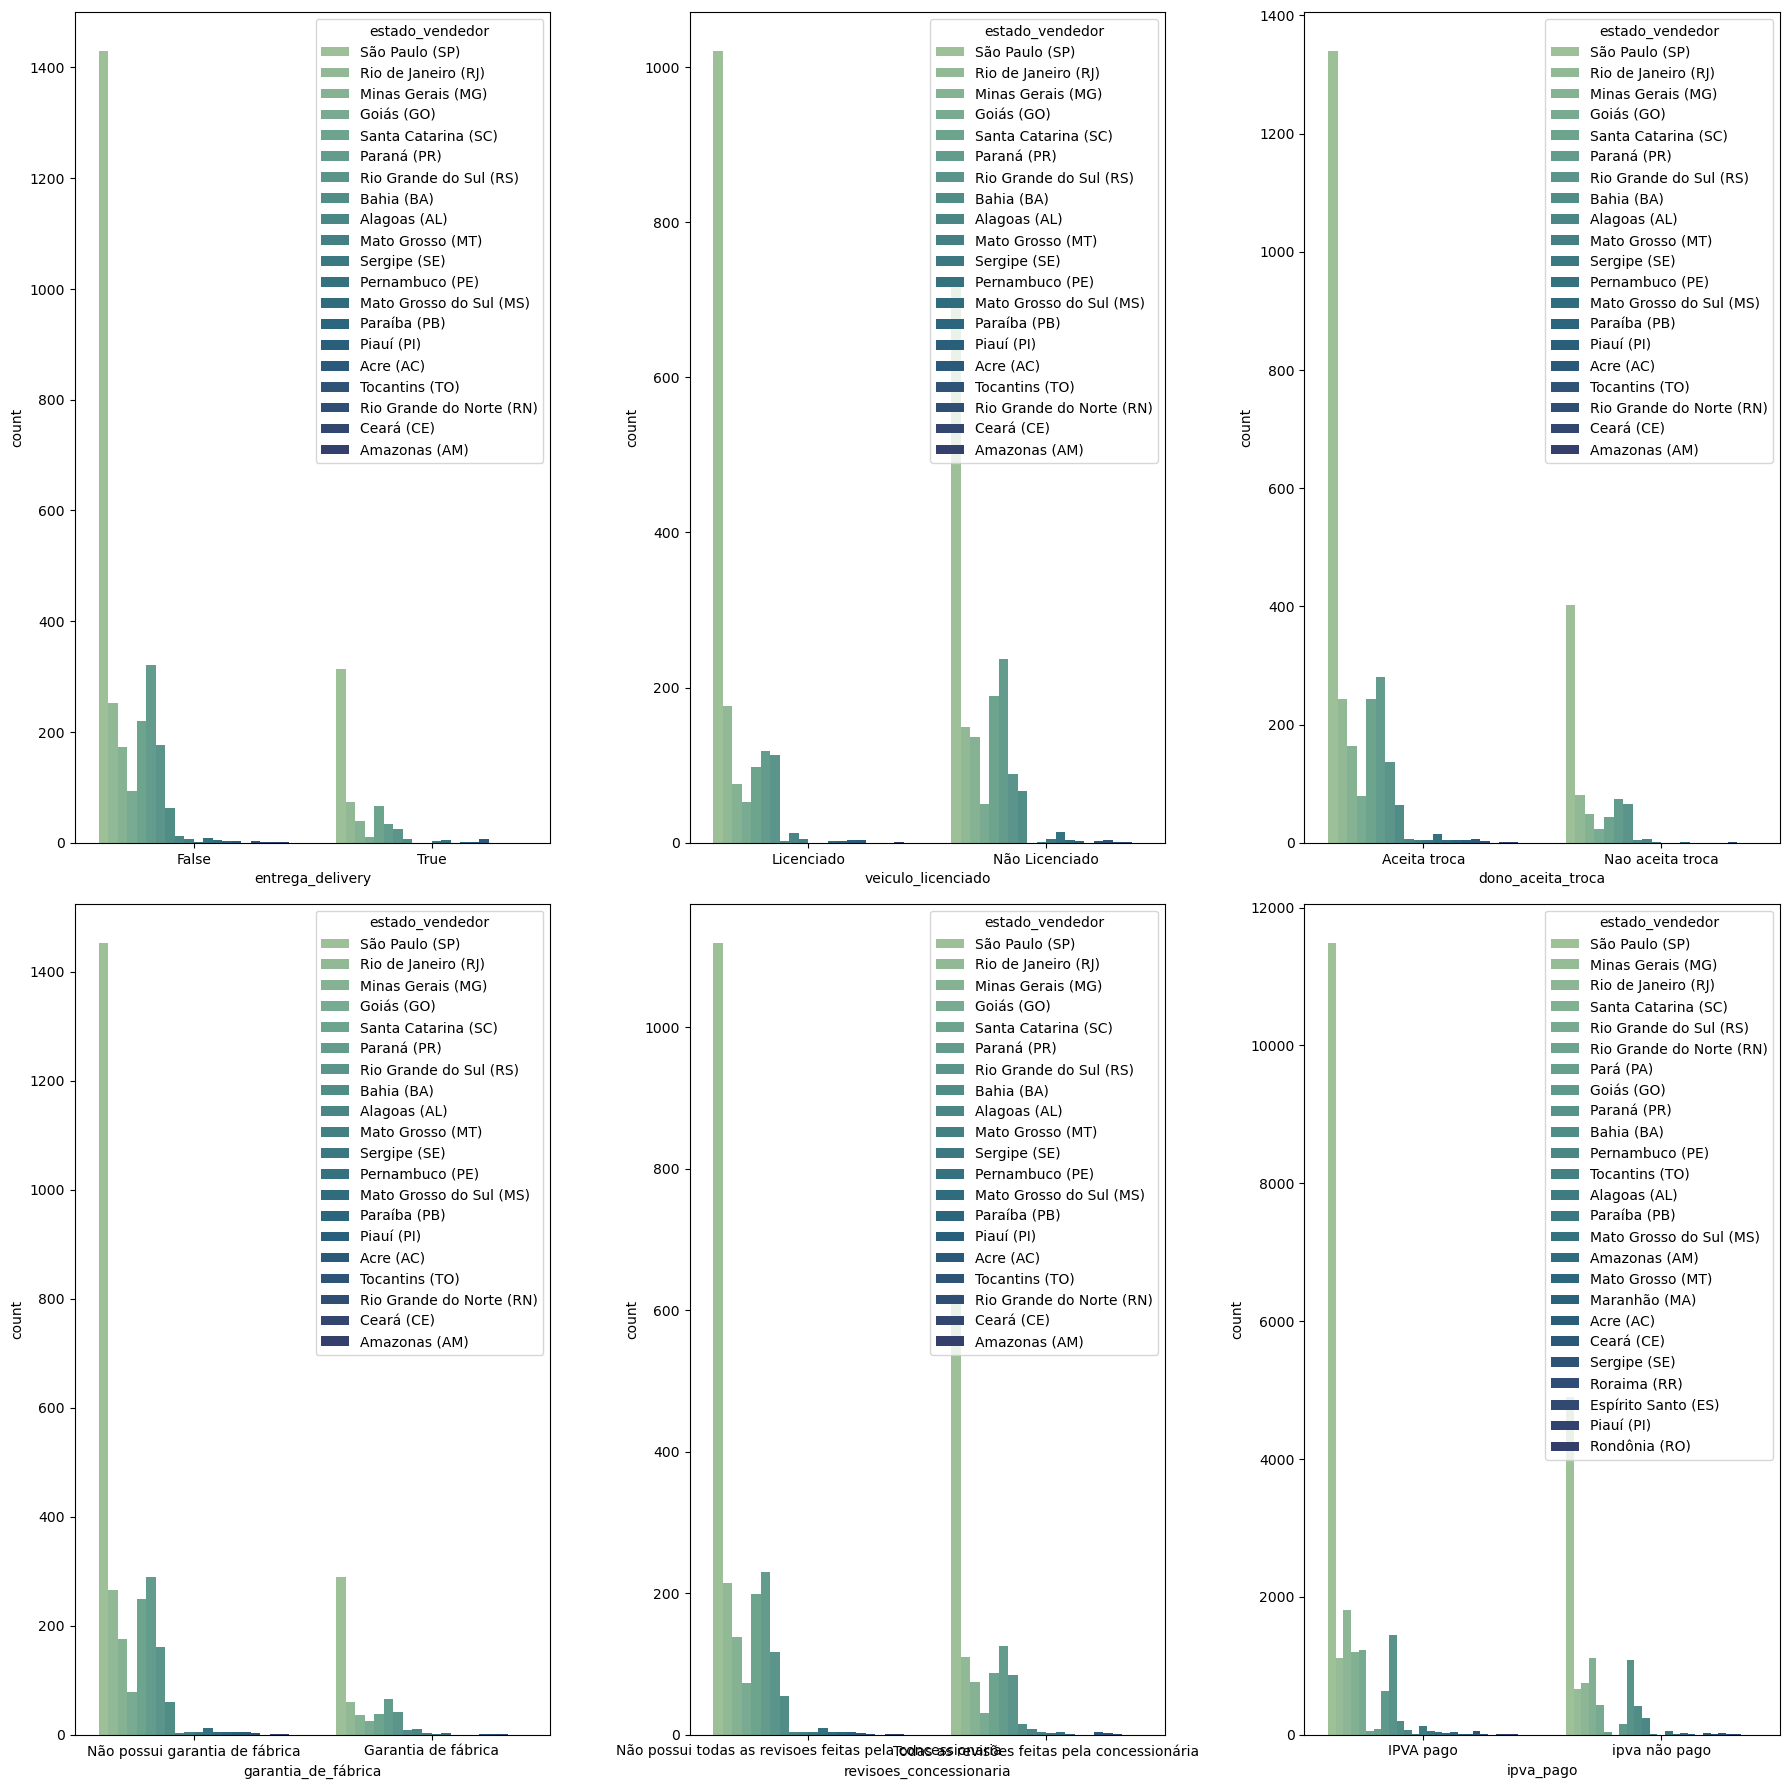

In [82]:
fig, axs = plt.subplots(2, 3, figsize=(18,18))

ax = sns.countplot(x='entrega_delivery', data=df_picape_automatico, palette="crest", ax=axs[0][0], hue='estado_vendedor')
*ax1 = sns.countplot(x='veiculo_licenciado', data=df_picape_automatico, palette="crest", ax=axs[0][1], hue='estado_vendedor')
*ax2 = sns.countplot(x='dono_aceita_troca', data=df_picape_automatico, palette="crest", ax=axs[0][2], hue='estado_vendedor')
ax3 = sns.countplot(x='garantia_de_fábrica', data=df_picape_automatico, palette="crest", ax=axs[1][0], hue='estado_vendedor')
ax4 = sns.countplot(x='revisoes_concessionaria', data=df_picape_automatico, palette="crest", ax=axs[1][1], hue='estado_vendedor')
*ax5 = sns.countplot(x='ipva_pago', data=df, palette="crest", ax=axs[1][2], hue='estado_vendedor')
# ax6 = sns.countplot(x='veiculo_licenciado', data=df, palette="flare", ax=axs[2][0], hue='estado_vendedor')
# ax7 = sns.countplot(x='garantia_de_fábrica', data=df, palette="flare", ax=axs[2][1], hue='estado_vendedor')
# ax8 = sns.countplot(x='preco', data=df, palette="flare", ax=axs[2][2], hue='estado_vendedor')

# plot_annotate(ax, 'Serviço de Telefonia')
# plot_annotate(ax1, "Serviço de Várias Linhas")
# plot_annotate(ax2, "Serviço de Internet")
# plot_annotate(ax3, "Serviço de Segurança online")
# plot_annotate(ax4, "Serviço de Backup Online")
# plot_annotate(ax5, "Serviço de Proteção de Dispositivos")
# plot_annotate(ax6, "Serviço de Suporte Técnico ")
# plot_annotate(ax7, "Serviço de Streaming de TV")
# plot_annotate(ax8, "Serviço de Streaming de filmes")

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(figsize=(18, 4))
sns.boxplot(y='preco', x='estado_vendedor', data=df_picape_automatico, palette="crest")

plt.show()

In [ ]:
df['tipo'].unique()

In [ ]:
df['preco'].min()

c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

   entrega_delivery
   elegivel_revisao
   dono_aceita_troca
   veiculo_único_dono
   revisoes_concessionaria
   ipva_pago
   veiculo_licenciado
   garantia_de_fábrica
   preco

In [154]:
df['garantia_de_fábrica'].unique()

array(['Não possui garantia de fábrica', 'Garantia de fábrica'],
      dtype=object)

In [164]:
df_garantia = df.groupby('estado_vendedor')['garantia_de_fábrica'].value_counts().reset_index(name='Total').sort_values(by='Total', ascending=False)

In [165]:
df_garantia[df_garantia['garantia_de_fábrica']=='Garantia de fábrica'] 

estado_vendedor  garantia_de_fábrica  Total
43            São Paulo (SP)  Garantia de fábrica   2307
35       Rio de Janeiro (RJ)  Garantia de fábrica    412
22               Paraná (PR)  Garantia de fábrica    389
39       Santa Catarina (SC)  Garantia de fábrica    330
33    Rio Grande do Sul (RS)  Garantia de fábrica    281
20         Minas Gerais (MG)  Garantia de fábrica    264
13                Goiás (GO)  Garantia de fábrica    186
3               Alagoas (AL)  Garantia de fábrica     58
7                 Bahia (BA)  Garantia de fábrica     51
28           Pernambuco (PE)  Garantia de fábrica     20
26                 Pará (PA)  Garantia de fábrica     17
18   Mato Grosso do Sul (MS)  Garantia de fábrica     13
11       Espírito Santo (ES)  Garantia de fábrica      9
31  Rio Grande do Norte (RN)  Garantia de fábrica      9
5              Amazonas (AM)  Garantia de fábrica      9
41              Sergipe (SE)  Garantia de fábrica      3
16          Mato Grosso (MT)  Garantia de fábrica      2
1                  Acre (AC)  Garantia de fábrica      2
24              Paraíba (PB)  Garantia de fábrica      1
9                 Ceará (CE)  Garantia de fábrica      1
45            Tocantins (TO)  Garantia de fábrica      1

In [168]:
#df_garantia = df.groupby('estado_vendedor')['garantia_de_fábrica'].value_counts().reset_index(name='Total').sort_values(by='Total', ascending=False)

df_agrupado = df.groupby(['estado_vendedor', 'garantia_de_fábrica']).agg(media_preco=('preco', 'mean')).reset_index()

df_agrupado[df_agrupado['garantia_de_fábrica']=='Garantia de fábrica'] 

estado_vendedor  garantia_de_fábrica    media_preco
0                  Acre (AC)  Garantia de fábrica  150416.911346
2               Alagoas (AL)  Garantia de fábrica  154268.676544
4              Amazonas (AM)  Garantia de fábrica   99617.303347
6                 Bahia (BA)  Garantia de fábrica  165221.236199
8                 Ceará (CE)  Garantia de fábrica  123939.878795
10       Espírito Santo (ES)  Garantia de fábrica  104030.208116
12                Goiás (GO)  Garantia de fábrica  174521.413156
15          Mato Grosso (MT)  Garantia de fábrica  197657.066561
17   Mato Grosso do Sul (MS)  Garantia de fábrica  121709.589845
19         Minas Gerais (MG)  Garantia de fábrica  161206.273890
21               Paraná (PR)  Garantia de fábrica  175578.245503
23              Paraíba (PB)  Garantia de fábrica   95762.746630
25                 Pará (PA)  Garantia de fábrica   98156.615283
27           Pernambuco (PE)  Garantia de fábrica  149898.416932
30  Rio Grande do Norte (RN)  Garantia de fábrica  133120.393894
32    Rio Grande do Sul (RS)  Garantia de fábrica  176442.236455
34       Rio de Janeiro (RJ)  Garantia de fábrica  179109.858403
38       Santa Catarina (SC)  Garantia de fábrica  173798.439853
40              Sergipe (SE)  Garantia de fábrica  367138.430255
42            São Paulo (SP)  Garantia de fábrica  166751.081004
44            Tocantins (TO)  Garantia de fábrica  243002.217032

In [174]:
df_garantia['media_preco'] = df_agrupado['media_preco']
df_garantia[df_garantia['garantia_de_fábrica']=='Garantia de fábrica'].sort_values(by='media_preco')#, ascending=False)

estado_vendedor  garantia_de_fábrica  Total    media_preco
5              Amazonas (AM)  Garantia de fábrica      9   81929.921145
1                  Acre (AC)  Garantia de fábrica      2   88861.311285
11       Espírito Santo (ES)  Garantia de fábrica      9   90912.498207
24              Paraíba (PB)  Garantia de fábrica      1   94464.457830
9                 Ceará (CE)  Garantia de fábrica      1  102444.130740
18   Mato Grosso do Sul (MS)  Garantia de fábrica     13  108283.468209
3               Alagoas (AL)  Garantia de fábrica     58  108816.954290
45            Tocantins (TO)  Garantia de fábrica      1  113095.978223
31  Rio Grande do Norte (RN)  Garantia de fábrica      9  114027.816582
28           Pernambuco (PE)  Garantia de fábrica     20  114927.030097
43            São Paulo (SP)  Garantia de fábrica   2307  123691.306286
7                 Bahia (BA)  Garantia de fábrica     51  125971.609121
35       Rio de Janeiro (RJ)  Garantia de fábrica    412  126443.991681
26                 Pará (PA)  Garantia de fábrica     17  127824.388228
39       Santa Catarina (SC)  Garantia de fábrica    330  127856.708242
20         Minas Gerais (MG)  Garantia de fábrica    264  130282.586295
33    Rio Grande do Sul (RS)  Garantia de fábrica    281  134218.014628
16          Mato Grosso (MT)  Garantia de fábrica      2  139790.378644
22               Paraná (PR)  Garantia de fábrica    389  139981.098548
13                Goiás (GO)  Garantia de fábrica    186  146905.987526
41              Sergipe (SE)  Garantia de fábrica      3  197753.202056

a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular (preco) e por quê?
   entrega_delivery
   elegivel_revisao
   dono_aceita_troca
   veiculo_único_dono
   revisoes_concessionaria
   ipva_pago
   veiculo_licenciado
   garantia_de_fábrica
   preco

In [221]:
df_carros_populares = df[df['preco'] < 80000]

In [192]:
df_carros_populares_ipva = df_carros_populares.groupby('estado_vendedor')['revisoes_dentro_agenda'].value_counts().reset_index(name='Total').sort_values(by='Total', ascending=False)

In [194]:
df_carros_populares_ipva[df_carros_populares_ipva['revisoes_dentro_agenda'] == 'Todas as revisões feitas pela agenda do carro']

estado_vendedor                         revisoes_dentro_agenda  \
36            São Paulo (SP)  Todas as revisões feitas pela agenda do carro   
28    Rio Grande do Sul (RS)  Todas as revisões feitas pela agenda do carro   
30       Rio de Janeiro (RJ)  Todas as revisões feitas pela agenda do carro   
33       Santa Catarina (SC)  Todas as revisões feitas pela agenda do carro   
19               Paraná (PR)  Todas as revisões feitas pela agenda do carro   
17         Minas Gerais (MG)  Todas as revisões feitas pela agenda do carro   
13                Goiás (GO)  Todas as revisões feitas pela agenda do carro   
7                 Bahia (BA)  Todas as revisões feitas pela agenda do carro   
24           Pernambuco (PE)  Todas as revisões feitas pela agenda do carro   
22                 Pará (PA)  Todas as revisões feitas pela agenda do carro   
1                  Acre (AC)  Todas as revisões feitas pela agenda do carro   
26  Rio Grande do Norte (RN)  Todas as revisões feitas pela agenda do carro   
11       Espírito Santo (ES)  Todas as revisões feitas pela agenda do carro   
5              Amazonas (AM)  Todas as revisões feitas pela agenda do carro   
9                 Ceará (CE)  Todas as revisões feitas pela agenda do carro   
3               Alagoas (AL)  Todas as revisões feitas pela agenda do carro   

    Total  
36    680  
28     89  
30     81  
33     78  
19     71  
17     58  
13     20  
7       8  
24      7  
22      4  
1       4  
26      3  
11      2  
5       2  
9       1  
3       1

In [ ]:
revisoes_concessionaria, veiculo_único_dono, entrega_delivery, dono_aceita_troca, garantia_de_fábrica

In [191]:
df_carros_populares_ipva[df_carros_populares_ipva['garantia_de_fábrica'] == 'Garantia de fábrica']

estado_vendedor  garantia_de_fábrica  Total
35            São Paulo (SP)  Garantia de fábrica    246
18               Paraná (PR)  Garantia de fábrica     35
32       Santa Catarina (SC)  Garantia de fábrica     33
29       Rio de Janeiro (RJ)  Garantia de fábrica     32
27    Rio Grande do Sul (RS)  Garantia de fábrica     31
16         Minas Gerais (MG)  Garantia de fábrica     24
12                Goiás (GO)  Garantia de fábrica     15
7                 Bahia (BA)  Garantia de fábrica      9
21                 Pará (PA)  Garantia de fábrica      7
3               Alagoas (AL)  Garantia de fábrica      7
23           Pernambuco (PE)  Garantia de fábrica      5
25  Rio Grande do Norte (RN)  Garantia de fábrica      3
10       Espírito Santo (ES)  Garantia de fábrica      2
5              Amazonas (AM)  Garantia de fábrica      2
1                  Acre (AC)  Garantia de fábrica      1

In [206]:
df_carros_populares

num_fotos       marca   modelo                                  versao  \
0            8.0      NISSAN    KICKS         1.6 16V FLEXSTART SL 4P XTRONIC   
5           13.0     HYUNDAI    HB20S     1.0 COMFORT PLUS 12V FLEX 4P MANUAL   
7           15.0       HONDA      FIT           1.5 LX 16V FLEX 4P AUTOMÁTICO   
8            8.0  VOLKSWAGEN       UP      1.0 TSI HIGH UP 12V FLEX 4P MANUAL   
10           8.0      TOYOTA  FIELDER         1.8 SE-G 16V FLEX 4P AUTOMÁTICO   
...          ...         ...      ...                                     ...   
29570        8.0      TOYOTA  COROLLA          2.0 XEI 16V FLEX 4P AUTOMÁTICO   
29573       17.0  VOLKSWAGEN     POLO      1.0 200 TSI COMFORTLINE AUTOMÁTICO   
29577        8.0   CHEVROLET     SPIN       1.8 PREMIER 8V FLEX 4P AUTOMÁTICO   
29578        8.0     HYUNDAI     HB20           1.0 12V FLEX EVOLUTION MANUAL   
29582        8.0     PEUGEOT     2008  1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO   

       ano_de_fabricacao  ano_modelo  hodometro      cambio  num_portas  \
0                   2017      2017.0    67772.0         CVT           4   
5                   2017      2018.0    85314.0      Manual           4   
7                   2016      2017.0    95054.0  Automática           4   
8                   2017      2018.0    39987.0      Manual           4   
10                  1996      2012.0   210099.0  Automática           4   
...                  ...         ...        ...         ...         ...   
29570               2016      2017.0    43045.0         CVT           4   
29573               2018      2018.0    55868.0  Automática           4   
29577               2020      2021.0    39498.0  Automática           4   
29578               2021      2022.0    28784.0      Manual           4   
29582               2021      2022.0    35376.0  Automática           4   

            tipo  ...  troca elegivel_revisao dono_aceita_troca  \
0           Sedã  ...  False            False  Nao aceita troca   
5           Sedã  ...   True            False      Aceita troca   
7      Hatchback  ...  False            False      Aceita troca   
8           Sedã  ...  False            False  Nao aceita troca   
10      Perua/SW  ...  False            False      Aceita troca   
...          ...  ...    ...              ...               ...   
29570       Sedã  ...  False            False  Nao aceita troca   
29573  Hatchback  ...   True            False      Aceita troca   
29577       Sedã  ...   True            False      Aceita troca   
29578  Hatchback  ...  False            False      Aceita troca   
29582       Sedã  ...  False            False      Aceita troca   

      veiculo_único_dono                            revisoes_concessionaria  \
0       Não é único dono       Todas as revisões feitas pela concessionária   
5       Não é único dono  Não possui todas as revisoes feitas pela conce...   
7       Não é único dono  Não possui todas as revisoes feitas pela conce...   
8             Único dono       Todas as revisões feitas pela concessionária   
10      Não é único dono  Não possui todas as revisoes feitas pela conce...   
...                  ...                                                ...   
29570         Único dono       Todas as revisões feitas pela concessionária   
29573   Não é único dono  Não possui todas as revisoes feitas pela conce...   
29577   Não é único dono  Não possui todas as revisoes feitas pela conce...   
29578   Não é único dono  Não possui todas as revisoes feitas pela conce...   
29582         Único dono  Não possui todas as revisoes feitas pela conce...   

           ipva_pago  veiculo_licenciado             garantia_de_fábrica  \
0          IPVA pago          Licenciado  Não possui garantia de fábrica   
5      ipva não pago      Não Licenciado  Não possui garantia de fábrica   
7      ipva não pago      Não Licenciado  Não possui garantia de fábrica   
8          IPVA pago          Licenciado             Garantia de fábrica   

In [222]:
df_carros_populares = df_carros_populares.groupby(['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda']).agg(media_preco=('preco', 'mean')).reset_index()
#df_carros_populares


In [223]:
df_carros_populares

estado_vendedor             garantia_de_fábrica  \
0        Acre (AC)             Garantia de fábrica   
1        Acre (AC)  Não possui garantia de fábrica   
2        Acre (AC)  Não possui garantia de fábrica   
3     Alagoas (AL)             Garantia de fábrica   
4     Alagoas (AL)             Garantia de fábrica   
..             ...                             ...   
56  São Paulo (SP)             Garantia de fábrica   
57  São Paulo (SP)             Garantia de fábrica   
58  São Paulo (SP)  Não possui garantia de fábrica   
59  São Paulo (SP)  Não possui garantia de fábrica   
60  Tocantins (TO)  Não possui garantia de fábrica   

                               revisoes_dentro_agenda   media_preco  
0   não possui todas as revisões feitas pela agend...  72811.745577  
1       Todas as revisões feitas pela agenda do carro  62812.803226  
2   não possui todas as revisões feitas pela agend...  51997.502474  
3       Todas as revisões feitas pela agenda do carro  55861.243630  
4   não possui todas as revisões feitas pela agend...  64103.417434  
..                                                ...           ...  
56      Todas as revisões feitas pela agenda do carro  64187.042686  
57  não possui todas as revisões feitas pela agend...  66180.936241  
58      Todas as revisões feitas pela agenda do carro  57305.219154  
59  não possui todas as revisões feitas pela agend...  58073.561045  
60  não possui todas as revisões feitas pela agend...  55599.893939  

[61 rows x 4 columns]

In [232]:
df_carros_popularesf = df_carros_populares.loc[(df_carros_populares['revisoes_dentro_agenda'] == 'Todas as revisões feitas pela agenda do carro') & (df_carros_populares['garantia_de_fábrica'] == 'Garantia de fábrica')]
df_carros_popularesf.sort_values(by='media_preco', ascending=False)

estado_vendedor  garantia_de_fábrica  \
33                 Pará (PA)  Garantia de fábrica   
42    Rio Grande do Sul (RS)  Garantia de fábrica   
37           Pernambuco (PE)  Garantia de fábrica   
40  Rio Grande do Norte (RN)  Garantia de fábrica   
56            São Paulo (SP)  Garantia de fábrica   
28               Paraná (PR)  Garantia de fábrica   
51       Santa Catarina (SC)  Garantia de fábrica   
46       Rio de Janeiro (RJ)  Garantia de fábrica   
24         Minas Gerais (MG)  Garantia de fábrica   
6              Amazonas (AM)  Garantia de fábrica   
18                Goiás (GO)  Garantia de fábrica   
3               Alagoas (AL)  Garantia de fábrica   
8                 Bahia (BA)  Garantia de fábrica   
14       Espírito Santo (ES)  Garantia de fábrica   

                           revisoes_dentro_agenda   media_preco  
33  Todas as revisões feitas pela agenda do carro  69592.002015  
42  Todas as revisões feitas pela agenda do carro  68648.874151  
37  Todas as revisões feitas pela agenda do carro  68354.036170  
40  Todas as revisões feitas pela agenda do carro  66213.423172  
56  Todas as revisões feitas pela agenda do carro  64187.042686  
28  Todas as revisões feitas pela agenda do carro  63914.622144  
51  Todas as revisões feitas pela agenda do carro  62747.155006  
46  Todas as revisões feitas pela agenda do carro  60905.771419  
24  Todas as revisões feitas pela agenda do carro  60712.027478  
6   Todas as revisões feitas pela agenda do carro  60467.432540  
18  Todas as revisões feitas pela agenda do carro  59261.299510  
3   Todas as revisões feitas pela agenda do carro  55861.243630  
8   Todas as revisões feitas pela agenda do carro  55814.727139  
14  Todas as revisões feitas pela agenda do carro  49919.575982

In [229]:
df_carros_populares2 = df_carros_populares.groupby(['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda']).size().reset_index(name='Total')
df_carros_populares2 = df_carros_populares2.loc[(df_carros_populares2['revisoes_dentro_agenda'] == 'Todas as revisões feitas pela agenda do carro') & (df_carros_populares2['garantia_de_fábrica'] == 'Garantia de fábrica')]
df_carros_populares2

estado_vendedor  garantia_de_fábrica  \
3               Alagoas (AL)  Garantia de fábrica   
6              Amazonas (AM)  Garantia de fábrica   
8                 Bahia (BA)  Garantia de fábrica   
14       Espírito Santo (ES)  Garantia de fábrica   
18                Goiás (GO)  Garantia de fábrica   
24         Minas Gerais (MG)  Garantia de fábrica   
28               Paraná (PR)  Garantia de fábrica   
33                 Pará (PA)  Garantia de fábrica   
37           Pernambuco (PE)  Garantia de fábrica   
40  Rio Grande do Norte (RN)  Garantia de fábrica   
42    Rio Grande do Sul (RS)  Garantia de fábrica   
46       Rio de Janeiro (RJ)  Garantia de fábrica   
51       Santa Catarina (SC)  Garantia de fábrica   
56            São Paulo (SP)  Garantia de fábrica   

                           revisoes_dentro_agenda  Total  
3   Todas as revisões feitas pela agenda do carro      1  
6   Todas as revisões feitas pela agenda do carro      1  
8   Todas as revisões feitas pela agenda do carro      1  
14  Todas as revisões feitas pela agenda do carro      1  
18  Todas as revisões feitas pela agenda do carro      1  
24  Todas as revisões feitas pela agenda do carro      1  
28  Todas as revisões feitas pela agenda do carro      1  
33  Todas as revisões feitas pela agenda do carro      1  
37  Todas as revisões feitas pela agenda do carro      1  
40  Todas as revisões feitas pela agenda do carro      1  
42  Todas as revisões feitas pela agenda do carro      1  
46  Todas as revisões feitas pela agenda do carro      1  
51  Todas as revisões feitas pela agenda do carro      1  
56  Todas as revisões feitas pela agenda do carro      1